In [213]:
%run "All_helper_classes.ipynb" sort=False

#from "Models training helpers.ipynb" we will import 3 helper classes and the associated helper methods.
parsing_helpers = generic_parsing_helpers()
aivm_helper = AIVM_helper()
model_helpers, info = default_model_helpers_for_project()
#if you want to see the paths now can call with...
display (HTML(info))

paths = project_paths()

#same for paths and repo data, display using...
display (HTML(paths.get_paths_data()))
display (HTML(paths.get_repo_data()))

#We could move these imports to the helper classes file
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
from sklearn.calibration import calibration_curve
from sklearn.calibration import CalibratedClassifierCV
from sklearn.isotonic import IsotonicRegression


Necessary libraries imported.
Initialised generic_parsing_helpers class and methods
Initialised AIVM_helper class and methods
Initialised model_helpers class and methods


In [2]:
%%javascript
//To remove scroll from any output area and automatically extend the jupyter cell
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
# visualization imports
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import base64
import io
sns.set() 
sns.set_style("whitegrid")
from sklearn.metrics import accuracy_score, auc, precision_score, roc_curve, confusion_matrix, classification_report
import tqdm
from sklearn.calibration import calibration_curve
from sklearn.calibration import CalibratedClassifierCV
from sklearn.isotonic import IsotonicRegression


# Read the Training data and also the gathered data(to generate vocab for word embedding)

In [4]:
#Read the combined original training data and audited data file from "training_ALL.tsv"
#Note this method already calls "remove_line_breaks"
USE_GIT_HUB = True

print (paths.TRAINING_DATA_ALL_DIR_FILE_GIT)
print (paths.TRAINING_DATA_ALL_DIR_FILE_LOCAL)

#Note this method already calls "remove_line_breaks"
training_df = model_helpers.get_training_data(
                            USE_GIT_HUB,
                            paths.TRAINING_DATA_ALL_DIR_FILE_GIT,
                            paths.TRAINING_DATA_ALL_DIR_FILE_LOCAL, 
                            paths.GIT_OWNER,
                            paths.GIT_REPO)

https://raw.githubusercontent.com/aideenf/AIVC/master/cp_wssc/Data/Iterative-models-building/Training%20data/Conventions/training_ALL.tsv
Data/Iterative-models-building/Training data/Conventions/training_ALL.tsv
Initialised generic_parsing_helpers class and methods


In [5]:
training_df.head(5)

,label,text,provenance,convention
0,1,+ This is an easter egg concerned with the com...,Manually_gathered,civic
1,1,Additionally you can modify SAM to integrate i...,Manually_gathered,civic
2,1,Chrome has the largest share of global usage a...,Manually_gathered,civic
3,1,Kivy is MIT licensed actively developed by a g...,Manually_gathered,civic
4,1,Thanks to our great community we\'ve finally r...,Manually_gathered,civic
5,1,The overwhelming support by the community gave...,Manually_gathered,civic
6,1,We\xe\x\xd like to make it easy for anyone to ...,Manually_gathered,civic
7,1,Whether you want learn which organizations are...,Manually_gathered,civic
8,1,Windows community supported,Manually_gathered,civic
9,1,a being can also be qualified as worthy if it ...,Manually_gathered,civic


In [6]:
#Note this method already processes the gathered data and reads either from local or directly from git.
gathered_conventions_files, gathered_conventions_df = model_helpers.get_aggregated_gathered_data (
                            USE_GIT_HUB,
                            paths.GATHERED_DATA_CONV_DIR_GIT,
                            paths.GATHERED_DATA_CONV_DIR_LOCAL,
                            paths.GITHUB_GATHERED_URL_PATH, 
                            paths.GIT_OWNER,
                            paths.GIT_REPO)


Initialised AIVM_helper class and methods


In [7]:
display (gathered_conventions_df.head(5))

,text,provenance
0,react can also render on the server using node...,Github
1,b open source society university path to a fre...,Github
2,the curriculum is designed as follows - intro ...,Github
3,all or nearly all course material prior to pro...,Github
4,"please check our frequently asked questions, a...",Github


In [11]:
column_to_tokenize = 'text'
gathered_and_training = pd.DataFrame(gathered_conventions_df[column_to_tokenize].append(training_df[column_to_tokenize]))##Adding training data sentences
extended_tokenizer = parsing_helpers.create_tokenizer(gathered_and_training, 
                                                        column_to_tokenize,
                                                        max_words=model_helpers.MAX_NB_WORDS)

display (type (extended_tokenizer))


keras_preprocessing.text.Tokenizer

In [12]:
## Vocabulary loading
def _read_glove_embeddings(glove_dir, embedding_dim):
    ## Reading GLOVE (precalculated word embeddings)
    embeddings_index = {}
    f = open(os.path.join(glove_dir, 'glove.6B.{}d.txt'.format(embedding_dim)))
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    f.close()

    return embeddings_index

In [13]:
embeddings_index =_read_glove_embeddings(glove_dir=paths.GLOVE_DIR_LOCAL, embedding_dim=model_helpers.EMBEDDING_DIM)

# Train the DL Models
A multi-label classifier assigns a set of labels to each sentence. The simplest multi-label classifier, called Binary Relevance (BR), applies one binary classifier to each label(convention) independently and takes the product of the individual label probabilities as the overall label-set probability (confidence). Despite its many known drawbacks, such as generating suboptimal predictions and poorly calibrated confidence scores, BR is widely used in practice due to its speed and simplicity.[ Tsoumakas, G., Katakis, I.: Multi-label classification: An overview. Int J Data Warehousing and Mining 2007, 1–13 (2007)]

As this problem is multi-label and multi class the overall solution is a one v's all, Binary Relevance approach.

In [14]:
## Train DL models
"""
N=1
models = []
for i in range(N):
    result = model_helpers.train_DL_models(training_df,
                data_class_column="convention", 
                data_label_column="label",
                tokenizer=extended_tokenizer,
                random_seed=0,
                use_validation=True) 
    models.append(result)
    
"""

_DLModels, _DLTokenizers, _DLData_val_x, _DLData_val_x_txt, _DLData_val_y, _DLTrain_histories = model_helpers.train_DL_models(training_df,
                data_class_column="convention", 
                data_label_column="label",
                tokenizer=extended_tokenizer,
                random_seed=0,
                use_validation=True) 
                


Found 83027 unique tokens.
----------------------------------------------------------------
            civic                  
----------------------------------------------------------------
Shape of data tensor: (456, 32)
Shape of label tensor: (456, 2)

Number of elements from each class in traing and validation set 
[181. 184.]
[47. 44.]


/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=3)`
/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=4)`
/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=5)`


model fitting - more complex convolutional neural network
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 32, 100)      8302800     input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 30, 128)      38528       embedding_1[0][0]                
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 29, 128)      51328       embedding_1[0][0]                
__________________________________

/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=3)`
/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=4)`
/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=5)`


model fitting - more complex convolutional neural network
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 32)           0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 32, 100)      8302800     input_2[0][0]                    
__________________________________________________________________________________________________
conv1d_5 (Conv1D)               (None, 30, 128)      38528       embedding_2[0][0]                
__________________________________________________________________________________________________
conv1d_6 (Conv1D)               (None, 29, 128)      51328       embedding_2[0][0]                
__________________________________

/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=3)`
/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=4)`
/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=5)`


model fitting - more complex convolutional neural network
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 32)           0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 32, 100)      8302800     input_3[0][0]                    
__________________________________________________________________________________________________
conv1d_9 (Conv1D)               (None, 30, 128)      38528       embedding_3[0][0]                
__________________________________________________________________________________________________
conv1d_10 (Conv1D)              (None, 29, 128)      51328       embedding_3[0][0]                
__________________________________

/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=3)`
/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=4)`
/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=5)`


model fitting - more complex convolutional neural network
Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 32)           0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 32, 100)      8302800     input_4[0][0]                    
__________________________________________________________________________________________________
conv1d_13 (Conv1D)              (None, 30, 128)      38528       embedding_4[0][0]                
__________________________________________________________________________________________________
conv1d_14 (Conv1D)              (None, 29, 128)      51328       embedding_4[0][0]                
__________________________________

/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=3)`
/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=4)`
/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=5)`


model fitting - more complex convolutional neural network
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 32)           0                                            
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 32, 100)      8302800     input_5[0][0]                    
__________________________________________________________________________________________________
conv1d_17 (Conv1D)              (None, 30, 128)      38528       embedding_5[0][0]                
__________________________________________________________________________________________________
conv1d_18 (Conv1D)              (None, 29, 128)      51328       embedding_5[0][0]                
__________________________________

/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=3)`
/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=4)`
/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=5)`


model fitting - more complex convolutional neural network
Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 32)           0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 32, 100)      8302800     input_6[0][0]                    
__________________________________________________________________________________________________
conv1d_21 (Conv1D)              (None, 30, 128)      38528       embedding_6[0][0]                
__________________________________________________________________________________________________
conv1d_22 (Conv1D)              (None, 29, 128)      51328       embedding_6[0][0]                
__________________________________

/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=3)`
/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=4)`
/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=5)`


model fitting - more complex convolutional neural network
Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 32)           0                                            
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, 32, 100)      8302800     input_7[0][0]                    
__________________________________________________________________________________________________
conv1d_25 (Conv1D)              (None, 30, 128)      38528       embedding_7[0][0]                
__________________________________________________________________________________________________
conv1d_26 (Conv1D)              (None, 29, 128)      51328       embedding_7[0][0]                
__________________________________

/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=3)`
/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=4)`
/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=5)`


model fitting - more complex convolutional neural network
Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 32)           0                                            
__________________________________________________________________________________________________
embedding_8 (Embedding)         (None, 32, 100)      8302800     input_8[0][0]                    
__________________________________________________________________________________________________
conv1d_29 (Conv1D)              (None, 30, 128)      38528       embedding_8[0][0]                
__________________________________________________________________________________________________
conv1d_30 (Conv1D)              (None, 29, 128)      51328       embedding_8[0][0]                
__________________________________

In [16]:
#not used therefor releasing memory. 
_DLTokenizers = 0
_DLTrain_histories = 0
gathered_conventions_files = 0
gathered_conventions_df = 0
gathered_and_training = 0
extended_tokenizer = 0
embeddings_index = 0

gc.collect()


0

In [ ]:
conv = "green"
num = 271
display(_DLData_val_x_txt[conv][num])
display(_DLData_val_y[conv][num])
y_actual = [int(x[0]<x[1]) for x in _DLData_val_y[conv]]
display(y_actual[num])
print(len(_DLData_val_x_txt[conv]))
print(len(y_actual))


# Methods used by various steps

In [109]:
def get_positive_preds_with_threshold(preds, threshold=0.5):
    #Keras .predict returns a list of [x, y] values where x = probability of 0 and y is probability of 1
    #ie 
    preds_results = []
    for j in range(len(preds)):
        #int_pred = int(preds[j][1]>=threshold)
        int_pred = int(preds[j]>=threshold)
        preds_results.append(int_pred)
    return preds_results

def get_positive_preds_probabilities(preds):
    #Keras .predict returns a list of [x, y] values where x = probability of 0 and y is probability of 1
    #i.e preds[j][1] is the probability of a positive prediction.
    preds_results = []
    for j in range(len(preds)):
        int_pred = preds[j][1]
        preds_results.append(int_pred)    
    return preds_results

def apply_pred_threshold(preds, t):
    res = np.zeros(len(preds))  
    res[preds>=t] = 1
    return res

def calculate_metrics(results, num_samples, model):
    
    results.insert(0,'index', range(0,results.shape[0]))
    metrics_df = pd.DataFrame(index = results['index'], columns=['model','threshold','accuracy', 'precision_ppv', 'recall_sensitivity_tpr', 'f1', 'f2', 'f0_5','specifity_selectivity_tnr', 'tpr', 'fpr'])

    for i in results.iterrows():
        
        index, threshold, tp, fp, tn, fn = i[1]

        assert tp + fp + tn + fn == num_samples 
        
        recall = tp / (tp + fn)
        
        if tp == fp == 0:
            precision = 0
            true_positive_rate = 0
        
        else:
            precision = tp / (tp + fp)
            true_positive_rate = tp / (tp + fn)
            
        if precision == recall == 0:
            f1 = 0
            f2 = 0
            f0_5 = 0
            
        else:
            f1 = 2 * (precision * recall) / (precision + recall)
            f2 = (2*2 + 1)*precision*recall / (2*2*precision + recall)#weights recall higher than precision, and 
            f0_5  = (.5*.5 + 1)*precision*recall /(.5*.5*precision + recall)#puts more emphasis on precision than recall.

        
        false_positive_rate = fp / (fp + tn)
        
        accuracy = (tp+tn)/(tp + fp + tn + fn)
        specifity = tn / (tn + fp)
        
        metrics_df.loc[index, 'model'] = model
        metrics_df.loc[index, 'accuracy'] = accuracy
        metrics_df.loc[index, 'precision_ppv'] = precision
        metrics_df.loc[index, 'recall_sensitivity_tpr'] = recall
        metrics_df.loc[index, 'f1'] = f1
        metrics_df.loc[index, 'f2'] = f2
        metrics_df.loc[index, 'f0_5'] = f0_5
        metrics_df.loc[index, 'specifity_selectivity_tnr'] = specifity
        metrics_df.loc[index, 'tpr'] = true_positive_rate
        metrics_df.loc[index, 'fpr'] = false_positive_rate  #inverse recall    
    metrics_df.reset_index()
    metrics_df = pd.concat([results, metrics_df.drop("threshold", axis=1)],axis=1, join='inner', sort = False)
    metrics_df = metrics_df.drop("index", axis=1)
    
    #set the model name to col 0 for consistency
    model = metrics_df.pop('model')
    metrics_df.insert(0, 'model', model)
    return metrics_df


def calculate_full_set_micro_average(results):
    
    metrics_df = pd.DataFrame(columns=['model','threshold','tp', 'fp', 'tn', 'fn', 'accuracy', 'precision_ppv', 'recall_sensitivity_tpr', 'f1', 'f2', 'f0_5','specifity_selectivity_tnr', 'tpr', 'fpr'])    
    tp =  results[0]
    fp =  results[1]
    tn =  results[2]
    fn =  results[3]
  
    recall = tp / (tp + fn)
        
    if tp == fp == 0:
        precision = 0
        true_positive_rate = 0
        
    else:
        precision = tp / (tp + fp)
        true_positive_rate = tp / (tp + fn)
            
    if precision == recall == 0:
        f1 = 0
        f2 = 0
        f0_5 = 0
            
    else:
        f1 = 2 * (precision * recall) / (precision + recall)
        f2 = (2*2 + 1)*precision*recall / (2*2*precision + recall)#weights recall higher than precision, and 
        f0_5  = (.5*.5 + 1)*precision*recall /(.5*.5*precision + recall)#puts more emphasis on precision than recall.

        
    false_positive_rate = fp / (fp + tn)
        
    accuracy = (tp+tn)/(tp + fp + tn + fn)
    specifity = tn / (tn + fp)
    

    metrics_df.loc[0, 'model'] = "set_micro_average"
    metrics_df.loc[0, 'threshold'] = "NaN"
    metrics_df.loc[0, 'tp'] = tp
    metrics_df.loc[0, 'fp'] = fp
    metrics_df.loc[0, 'tn'] = tn
    metrics_df.loc[0, 'fn'] = fn
    metrics_df.loc[0, 'accuracy'] = accuracy
    metrics_df.loc[0, 'precision_ppv'] = precision
    metrics_df.loc[0, 'recall_sensitivity_tpr'] = recall
    metrics_df.loc[0, 'f1'] = f1
    metrics_df.loc[0, 'f2'] = f2
    metrics_df.loc[0, 'f0_5'] = f0_5
    metrics_df.loc[0, 'specifity_selectivity_tnr'] = specifity
    metrics_df.loc[0, 'tpr'] = true_positive_rate
    metrics_df.loc[0, 'fpr'] = false_positive_rate  #inverse recall    
    metrics_df.reset_index()
   
    
    #set the model name to col 0 for consistency
    model = metrics_df.pop('model')
    metrics_df.insert(0, 'model', model)
    
    return metrics_df

# Calibration  - The probability associated with the predicted class label should reflect its ground truth correctness likelihood.

Now we have our simple multi-label "Binary Relevance(BR)" classifier i.e  one binary classifier for each of our 8 labels(conventions).  we should review individual model performance and model overall set performane to determine which confidence/probability thresholds to use for the individual models in order to produce the best overall set performance.

"BR has two well-known drawbacks. First, BR neglects label dependencies and this often leads to prediction errors: some BR predictions are incomplete, eg. tagging cat but not animal for an image, and some are conflicting, such as predicting both the code "Pain in left knee" and the code "Pain in unspecified knee" for a medical note." In our case there are no label dependencies(no convention dependencies) so this drawback is not an issue.

The second drawback is that the overall set is often not well calibrated. In order for the overall set to be well calibrated the first task will be to ensure that each individula model is well calibrated. A probabilistic model is well calibrated if for example when we 'bin' the test samples based on their predicted probabilities and 
when we then examine each bin’s true outcomes,  the true outcome should have a proportion close to the probabilities in the bin.  If we predict that we are 99% sure, and if we are only right 50% of the time, this is not calibrated because our estimation was too optimistic. Similarly, if we predict that we are only 60% sure, and we are right 80% of the time, this is not calibrated because our estimation was too pessimistic.

If we split our probability 0 to 1 into 10 bins (0-0.1, 0.1-0.2,.... 0.8 to 1) then in the .8 bin 80% of the predictions should in theory be correct(based on true outcomes) as this would basically imply an 80% confidence rating. This information can be reflected in a reliability diagram(or calibration plot). Well calibrated classifiers are probabilistic classifiers for which the output of the predict_proba method can be directly interpreted as a confidence level. For instance, a well calibrated (binary) classifier should classify the samples such that among the samples to which it gave a predict_proba value close to 0.8, approximately 80% actually belong to the positive class.

NOTE: For each bin, the mean predicted value is plotted against the true fraction of positive cases. If the model is well calibrated the points will fall near the diagonal line.

below we plot the reliability diagram for each of our 8 models, against a version calibrated with isotonic regression.

<Figure size 1152x576 with 0 Axes>

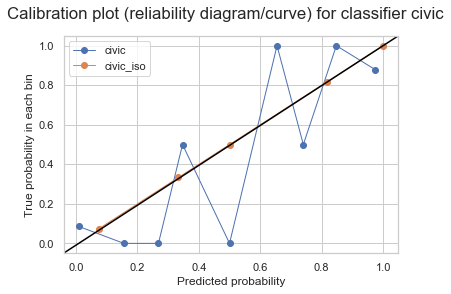

<Figure size 432x288 with 0 Axes>

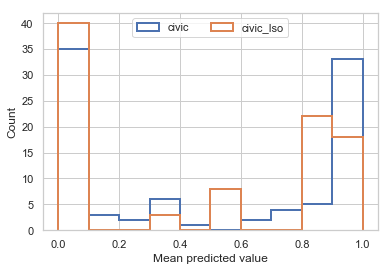

<Figure size 432x288 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

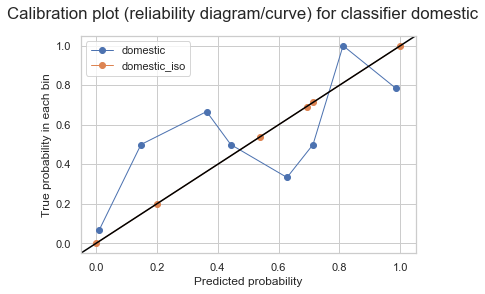

<Figure size 432x288 with 0 Axes>

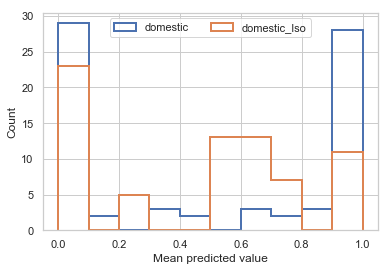

<Figure size 432x288 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

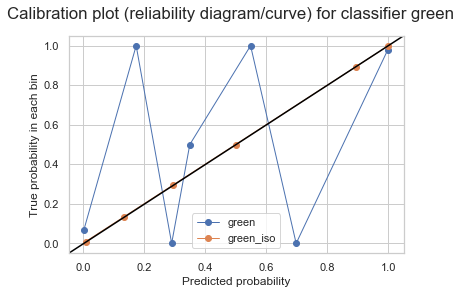

<Figure size 432x288 with 0 Axes>

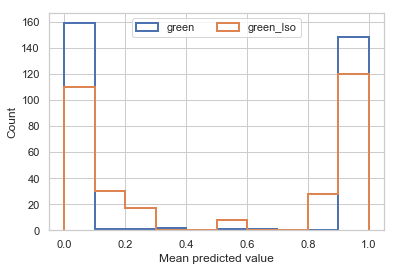

<Figure size 432x288 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

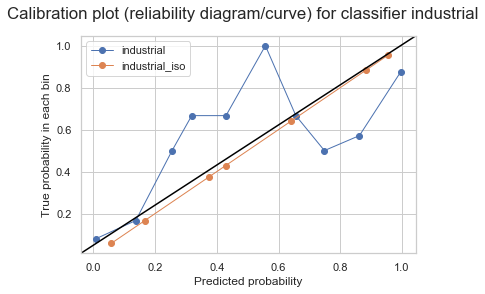

<Figure size 432x288 with 0 Axes>

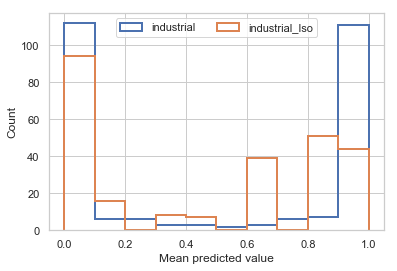

<Figure size 432x288 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

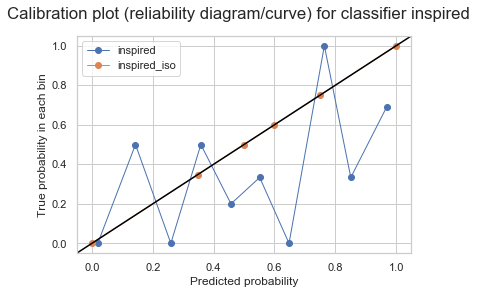

<Figure size 432x288 with 0 Axes>

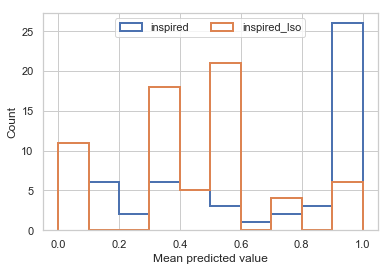

<Figure size 432x288 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

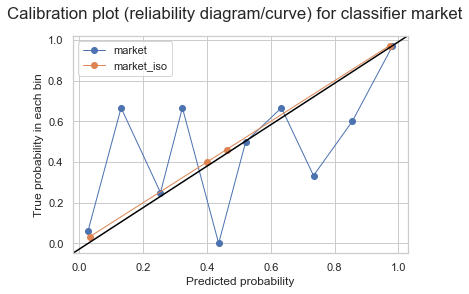

<Figure size 432x288 with 0 Axes>

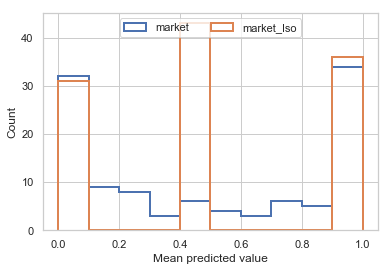

<Figure size 432x288 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

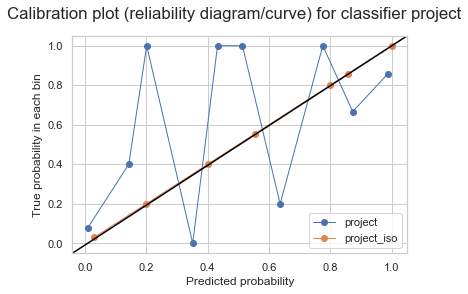

<Figure size 432x288 with 0 Axes>

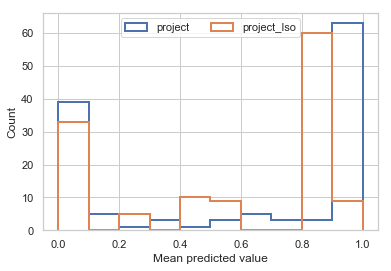

<Figure size 432x288 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

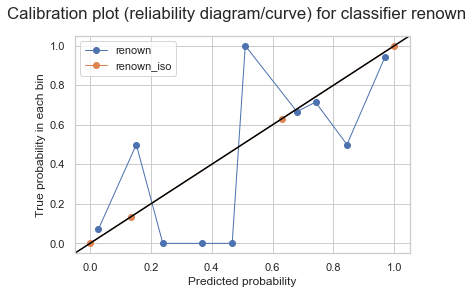

<Figure size 432x288 with 0 Axes>

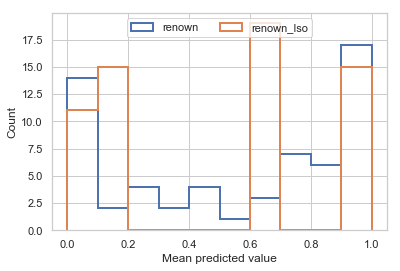

<Figure size 432x288 with 0 Axes>

In [18]:

_DLModelsIsotonicRegression = {}
for convention in _DLModels.keys():
    
    _DLModelsIsotonicRegression[convention] = IsotonicRegression(out_of_bounds = 'clip')
    #get the model, the validation data input(my_data_x) and the predicted label(preds) to compare to the actual label(y_actual).
    model = _DLModels[convention]
    data_x = _DLData_val_x[convention]
    
    y_actual = [int(x[0]<x[1]) for x in _DLData_val_y[convention]]
    y_predict = model.predict(data_x)
    y_predict = get_positive_preds_probabilities(y_predict)
    
    _DLModelsIsotonicRegression[convention].fit(y_predict, y_actual)
    y_predict_isotonic = _DLModelsIsotonicRegression[convention].predict(y_predict)

    
    #Plot the calibration curves for test data which is not callibrated and test data which is callibrated
    y, x = calibration_curve(y_actual, y_predict, n_bins=10);
    y_iso, x_iso = calibration_curve(y_actual, y_predict_isotonic, n_bins=10);
  

    plt.figure(figsize=(16,8))
    plt.rcParams.update({'font.size': 14})
    plt.rcParams.update({'font.weight': 'normal'})
    #plt.subplot(1, 2, 1)
    fig, ax = plt.subplots()
    # only these two lines are calibration curves
    plt.plot(x, y, marker='o', linewidth=1, label=convention);
    plt.plot(x_iso, y_iso, marker='o', linewidth=1, label=convention+'_iso');

    # reference line, legends, and axis labels
    line = mlines.Line2D([0, 1], [0, 1], color='black')
    transform = ax.transAxes
    line.set_transform(transform)
    ax.add_line(line)
    fig.suptitle('Calibration plot (reliability diagram/curve) for classifier ' + convention)
    ax.set_xlabel('Predicted probability')
    ax.set_ylabel('True probability in each bin')
    plt.legend()
    plt.show()
    plt.clf()
    
    fig, ax2 = plt.subplots()
    #plt.subplot(1, 2, 2)
    ax2.hist(y_predict, range=(0, 1), bins=10, label=convention,
                 histtype="step", lw=2)
    ax2.hist(y_predict_isotonic, range=(0, 1), bins=10, label=convention +'_Iso',
                 histtype="step", lw=2)
    ax2.set_xlabel("Mean predicted value")
    ax2.set_ylabel("Count")
    ax2.legend(loc="upper center", ncol=2)
    plt.show()
    plt.clf()
    gc.collect()

# Metrics

What is the treshold? Each of our models will return the Probability of a sentence belonging to the convention represented by the model. Now this probability needs to be turned into a Classification.
    - Belongs to the convention (Class 1)
    - Does not belong to the convention (Class 0)

we could say that this classification should occur at probability 0.5 however this may not be the best place to put it and for performance of our overall system this "threshold" may vary per model. We will therefor evaluate each individual models performance for a number of performance matrics, for a selection of different classification thresholds, in order to ultimately determine what Threshold  per model to use on unseen data once the model is live.


First we should review metrics for each individual model. In this case our training and evaluation data for each model is very balanced, in that we have an equal amount of Class 1 and Class 0 training sets per model. This balance has been achieved by data resampling either under-sampling the majority of the class, or over-sampling the minority class, or a mix of both(depending on which of the 8 models is in question). This is something to consider when ultimitely deciding the metric to base our threshold decisions on per model (but we should also keep in mind the overall system and the distribution of conventions in unseen(real world) data. 

The Metrics to evaluate:
    * Where Class 1 = Sentence belongs to Convention
    * Where Class 0 = Sentence does not belongs to Convention
 We evaluate against against a gold standard (or the ‘ground truth’ as it is perceived) i.e the true values v's the models predicted valuse in our test/validation data set. 

//////////////////////////////////////////*ACCURACY*/////////////////////////////////////////////////////////////

    - Accuracy = (TP + TN)/(TP + FP + TN + FN)

The probability that the classification result is correct, ie probability of correctly labeling sentences as class 1 or Class 0, given all the sentences!

Accuracy is simply the ratio of the correctly labeled sentences out of all sentences. Accuracy is a good measure  for well balanced datasets and when false negatives & false positive predictions have a similar 'costs'.

With imbalanced data, for example containing a lower amount of Class 1 compared to Class 0,  proclaiming all sentences as class 0 will have quite a high accuracy due to the low overall presence of Class 1, this may not ultimately be a helpful metric though if the cost of a false negative(false class 0) has a high cost. In the case of each of our individual models, our training data is quite balanced and there is a similar cost for FP and FN. however we need to keep in mind that the overall distribution of data in our overall system is not so evenly distributed across the labels that each model represents. 


////////////////////////////*PRECISION/POSITIVE PREDICTION VALUE*//////////////////////////////////////////////

     - Precision or Positive prediction value =  TP / (TP + FP)
     
The probability that a sentences we have labeled as Class 1(belonging to the convention) is actually Class 1. eg in green model, the probability that a sentenced classified as positive(1) for green, is actually green. 

Our focus then in terms of performance might be on identifying the actually positive cases, i.e to maximize the "precision".  Although a model with umbalanced data could also 'cheat' and maximize this by always returning “negative”. This metric is important if the most important function of the model will be to identify positives (Class 1). If this is a priority then we should choose a model with higher Recall/Sensitivity. 

   
//////////////////////////////*RECALL/SENSITIVITY/TRUE POSITIVE RATE*/////////////////////////////////////////
 
     - Recall or Sensitivity or TPR =  TP / (TP + FN)
     
Given the sentence is part of the convention, how likely is it that the classification will be positive?

Our focus then in terms of performance could maybe be in terms of higher importance on identifying the positive cases, i.e to maximize the "recall" or "sensitivity". Although a model could also 'cheat' and maximize this by always returning “positive”. This metric is important if the most important function of the model will be to identify positives (Class 1). If this is most important to us then we should choose a model with higher Recall/Sensitivity. 

//////////////////////////////*SPECIFITY/TRUE NEGATIVE RATE*//////////////////////////////////////////////////   

    - Specifity or TNR = TN / (TN + FP)

How good a classifier is at avoiding false alarms. Given the sentence does not belong to the convention, how likely is it that the classification will be negative(class 0). If correctly identifying negatives is most important, then we should choose specificity as the measurement metric. A classifier can 'cheat' and maximize this by always returning “negative”/Class 0.


///////////////////////////////////*F1, F2 and F0.5 SCORE*////////////////////////////////////////////////

    - F1 =  2 * ( (Precision * Recall) / (Precision + Recall) )
If we want to find an optimal blend of precision and recall we can combine the two metrics using what is called the F1 score, this is the 'harmonic mean' of precision and recall (harmonic mean is used as it punishes extreme values)

Note: there are other F measures:
F2 which weights recall higher than precision
F0.5 which puts more emphasis on precision than recall.

Fx = (1 + x^2) * ( (precision * recall) / (x^2 *(Precision + Recall)) 


///////////////////////////////////////////////////////////////////////////////////////////////////////////   

It is importalt to look at all relevant metrics instead of just one and to make a decision based on the problem to be resolved (the purpose of the classifier and the importance/impact of incorrectly classifying as positive vs' incorrectly classifying as negative for example it is worse to falsely imprison an innocent person than to let a guilty criminal get away, however the cost attached to FP's and FN'S in our sentence classification is of a different nature. 

    -ROC Curves summarize the trade-off between the true positive rate(recall) and false positive rate for a predictive model. AUC exists independently of a threshold, whereas accuracy / precision / recall / F1-score DO require the picking of a threshold, so we are measuring two different things.

    -Precision-Recall curves summarize the trade-off between the recall(true positive rate) and the Precision(positive predictive value) for a predictive model using different probability thresholds.

Note: ROC curves are appropriate when the observations are balanced between each class, whereas precision-recall curves are appropriate for imbalanced datasets.

Metrics for civic per Classification Threshold


,model,threshold,tp,fp,tn,fn,accuracy,precision_ppv,recall_sensitivity_tpr,f1,f2,f0_5,specifity_selectivity_tnr,tpr,fpr
0,civic,0.0,44,47,0,0,0.483516,0.483516,1,0.651852,0.82397,0.539216,0,1,1
1,civic,0.1,41,10,37,3,0.857143,0.803922,0.931818,0.863158,0.903084,0.826613,0.787234,0.931818,0.212766
2,civic,0.2,41,10,37,3,0.857143,0.803922,0.931818,0.863158,0.903084,0.826613,0.787234,0.931818,0.212766
3,civic,0.3,41,10,37,3,0.857143,0.803922,0.931818,0.863158,0.903084,0.826613,0.787234,0.931818,0.212766
4,civic,0.4,40,8,39,4,0.868132,0.833333,0.909091,0.869565,0.892857,0.847458,0.829787,0.909091,0.170213
5,civic,0.5,40,8,39,4,0.868132,0.833333,0.909091,0.869565,0.892857,0.847458,0.829787,0.909091,0.170213
6,civic,0.6,36,4,43,8,0.868132,0.9,0.818182,0.857143,0.833333,0.882353,0.914894,0.818182,0.0851064
7,civic,0.7,36,4,43,8,0.868132,0.9,0.818182,0.857143,0.833333,0.882353,0.914894,0.818182,0.0851064
8,civic,0.8,36,4,43,8,0.868132,0.9,0.818182,0.857143,0.833333,0.882353,0.914894,0.818182,0.0851064
9,civic,0.9,18,0,47,26,0.714286,1,0.409091,0.580645,0.463918,0.775862,1,0.409091,0


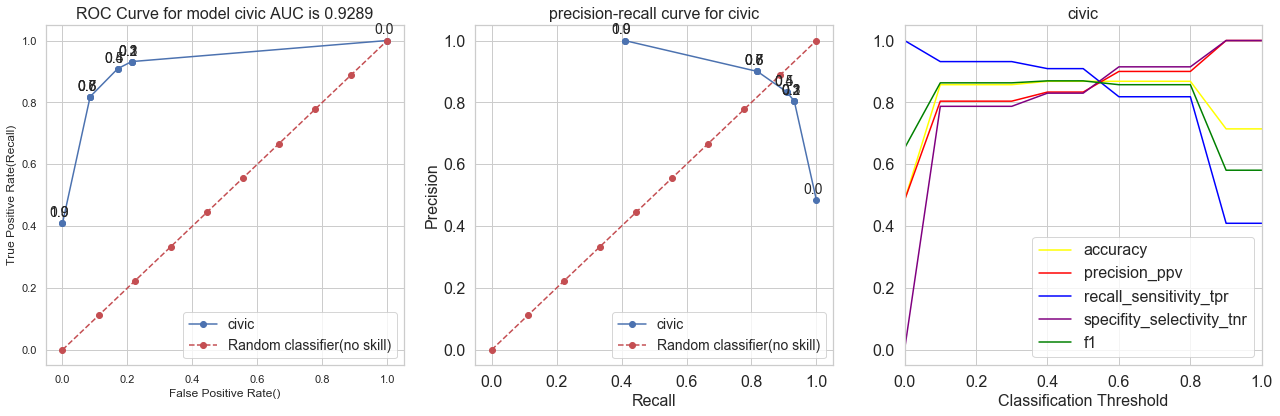

Max evaluation metric for model civic
* Accuracy:  0.8681318681318682 at threshold  0.4
* Precision:  1.0 at threshold  0.9
* Recall:  1.0 at threshold  0.0
* F1:  0.8695652173913043 at threshold  0.4



Metrics for domestic per Classification Threshold


,model,threshold,tp,fp,tn,fn,accuracy,precision_ppv,recall_sensitivity_tpr,f1,f2,f0_5,specifity_selectivity_tnr,tpr,fpr
0,domestic,0.0,33,39,0,0,0.458333,0.458333,1,0.628571,0.808824,0.514019,0,1,1
1,domestic,0.1,33,16,23,0,0.777778,0.673469,1,0.804878,0.911602,0.720524,0.589744,1,0.410256
2,domestic,0.2,33,16,23,0,0.777778,0.673469,1,0.804878,0.911602,0.720524,0.589744,1,0.410256
3,domestic,0.3,32,12,27,1,0.819444,0.727273,0.969697,0.831169,0.909091,0.76555,0.692308,0.969697,0.307692
4,domestic,0.4,32,12,27,1,0.819444,0.727273,0.969697,0.831169,0.909091,0.76555,0.692308,0.969697,0.307692
5,domestic,0.5,32,12,27,1,0.819444,0.727273,0.969697,0.831169,0.909091,0.76555,0.692308,0.969697,0.307692
6,domestic,0.6,25,6,33,8,0.805556,0.806452,0.757576,0.78125,0.766871,0.796178,0.846154,0.757576,0.153846
7,domestic,0.7,16,2,37,17,0.736111,0.888889,0.484848,0.627451,0.533333,0.761905,0.948718,0.484848,0.0512821
8,domestic,0.8,11,0,39,22,0.694444,1,0.333333,0.5,0.384615,0.714286,1,0.333333,0
9,domestic,0.9,11,0,39,22,0.694444,1,0.333333,0.5,0.384615,0.714286,1,0.333333,0


<Figure size 432x288 with 0 Axes>

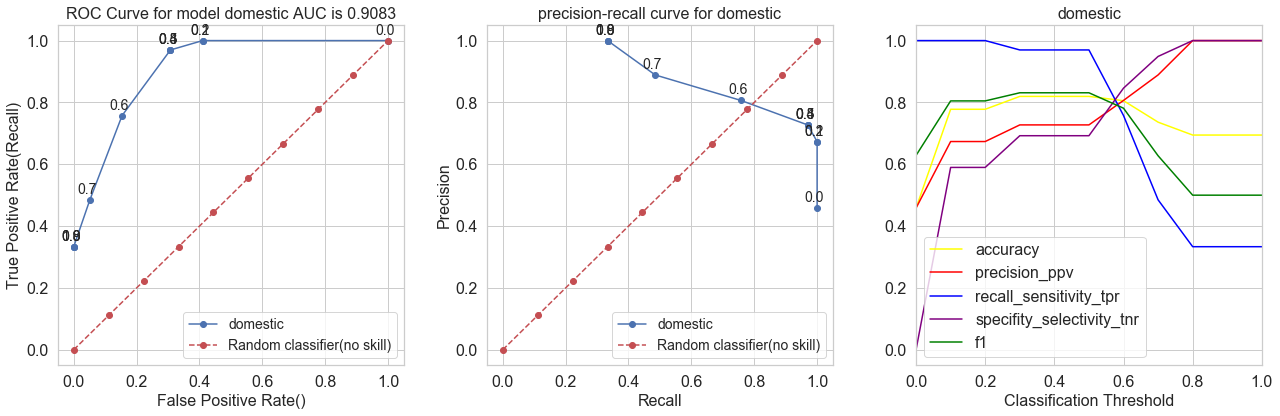

Max evaluation metric for model domestic
* Accuracy:  0.8194444444444444 at threshold  0.3
* Precision:  1.0 at threshold  0.8
* Recall:  1.0 at threshold  0.0
* F1:  0.8311688311688312 at threshold  0.3



Metrics for green per Classification Threshold


,model,threshold,tp,fp,tn,fn,accuracy,precision_ppv,recall_sensitivity_tpr,f1,f2,f0_5,specifity_selectivity_tnr,tpr,fpr
0,green,0.0,159,154,0,0,0.507987,0.507987,1,0.673729,0.837724,0.56343,0,1,1
1,green,0.1,158,45,109,1,0.853035,0.778325,0.993711,0.872928,0.941597,0.813594,0.707792,0.993711,0.292208
2,green,0.2,154,19,135,5,0.923323,0.890173,0.968553,0.927711,0.951792,0.904818,0.876623,0.968553,0.123377
3,green,0.3,149,7,147,10,0.945687,0.955128,0.937107,0.946032,0.940657,0.951469,0.954545,0.937107,0.0454545
4,green,0.4,149,7,147,10,0.945687,0.955128,0.937107,0.946032,0.940657,0.951469,0.954545,0.937107,0.0454545
5,green,0.5,149,7,147,10,0.945687,0.955128,0.937107,0.946032,0.940657,0.951469,0.954545,0.937107,0.0454545
6,green,0.6,145,3,151,14,0.945687,0.97973,0.91195,0.944625,0.924745,0.965379,0.980519,0.91195,0.0194805
7,green,0.7,145,3,151,14,0.945687,0.97973,0.91195,0.944625,0.924745,0.965379,0.980519,0.91195,0.0194805
8,green,0.8,145,3,151,14,0.945687,0.97973,0.91195,0.944625,0.924745,0.965379,0.980519,0.91195,0.0194805
9,green,0.9,120,0,154,39,0.875399,1,0.754717,0.860215,0.793651,0.938967,1,0.754717,0


<Figure size 432x288 with 0 Axes>

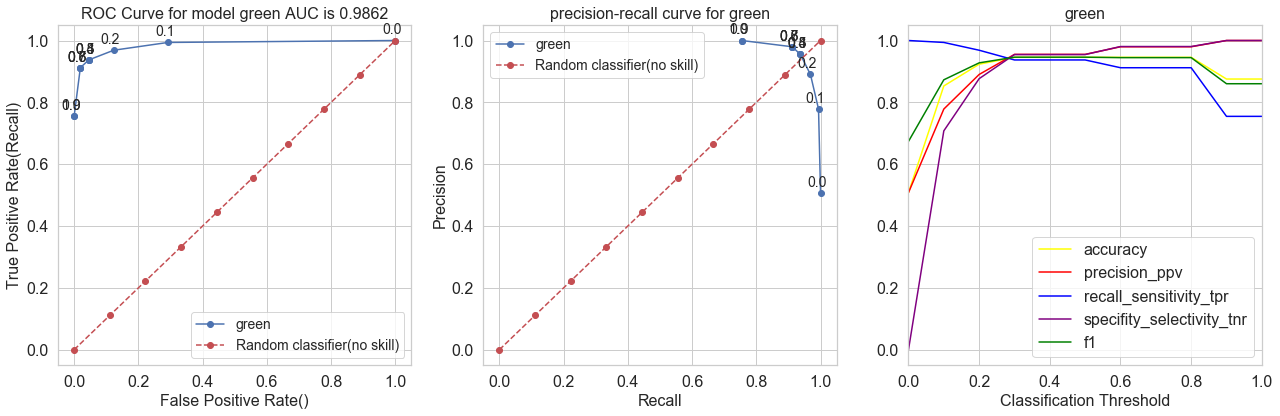

Max evaluation metric for model green
* Accuracy:  0.9456869009584664 at threshold  0.3
* Precision:  1.0 at threshold  0.9
* Recall:  1.0 at threshold  0.0
* F1:  0.946031746031746 at threshold  0.3



Metrics for industrial per Classification Threshold


,model,threshold,tp,fp,tn,fn,accuracy,precision_ppv,recall_sensitivity_tpr,f1,f2,f0_5,specifity_selectivity_tnr,tpr,fpr
0,industrial,0.0,125,134,0,0,0.482625,0.482625,1,0.651042,0.823452,0.538329,0,1,1
1,industrial,0.1,120,45,89,5,0.80695,0.727273,0.96,0.827586,0.902256,0.764331,0.664179,0.96,0.335821
2,industrial,0.2,118,31,103,7,0.853282,0.791946,0.944,0.861314,0.909091,0.818308,0.768657,0.944,0.231343
3,industrial,0.3,118,31,103,7,0.853282,0.791946,0.944,0.861314,0.909091,0.818308,0.768657,0.944,0.231343
4,industrial,0.4,115,26,108,10,0.861004,0.815603,0.92,0.864662,0.897036,0.834543,0.80597,0.92,0.19403
5,industrial,0.5,112,22,112,13,0.864865,0.835821,0.896,0.864865,0.883281,0.847201,0.835821,0.896,0.164179
6,industrial,0.6,112,22,112,13,0.864865,0.835821,0.896,0.864865,0.883281,0.847201,0.835821,0.896,0.164179
7,industrial,0.7,87,8,126,38,0.822394,0.915789,0.696,0.790909,0.731092,0.861386,0.940299,0.696,0.0597015
8,industrial,0.8,87,8,126,38,0.822394,0.915789,0.696,0.790909,0.731092,0.861386,0.940299,0.696,0.0597015
9,industrial,0.9,42,2,132,83,0.671815,0.954545,0.336,0.497041,0.386029,0.697674,0.985075,0.336,0.0149254


<Figure size 432x288 with 0 Axes>

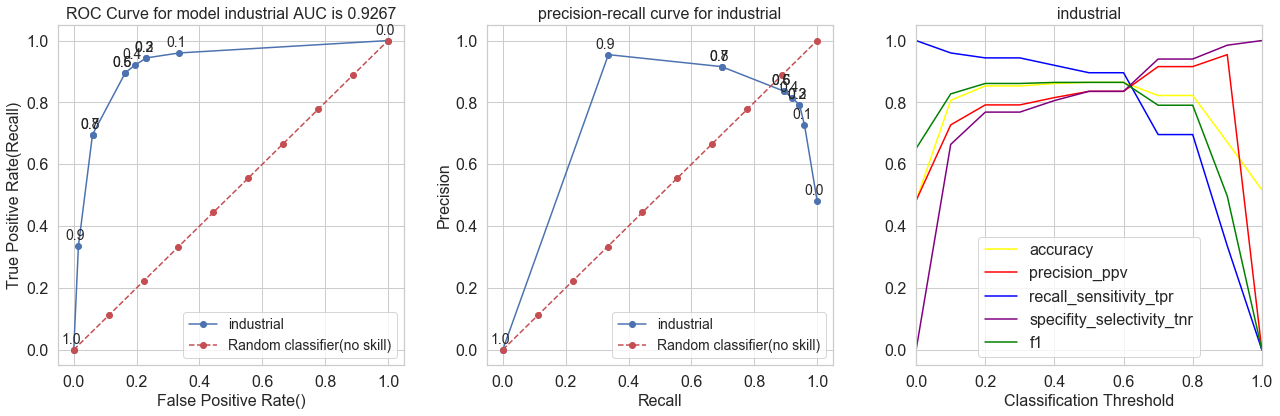

Max evaluation metric for model industrial
* Accuracy:  0.8648648648648649 at threshold  0.5
* Precision:  0.9545454545454546 at threshold  0.9
* Recall:  1.0 at threshold  0.0
* F1:  0.8648648648648648 at threshold  0.5



Metrics for inspired per Classification Threshold


,model,threshold,tp,fp,tn,fn,accuracy,precision_ppv,recall_sensitivity_tpr,f1,f2,f0_5,specifity_selectivity_tnr,tpr,fpr
0,inspired,0.0,29,36,0,0,0.446154,0.446154,1,0.617021,0.801105,0.50173,0,1,1
1,inspired,0.1,29,25,11,0,0.615385,0.537037,1,0.698795,0.852941,0.591837,0.305556,1,0.694444
2,inspired,0.2,29,25,11,0,0.615385,0.537037,1,0.698795,0.852941,0.591837,0.305556,1,0.694444
3,inspired,0.3,29,25,11,0,0.615385,0.537037,1,0.698795,0.852941,0.591837,0.305556,1,0.694444
4,inspired,0.4,23,13,23,6,0.707692,0.638889,0.793103,0.707692,0.756579,0.66474,0.638889,0.793103,0.361111
5,inspired,0.5,21,10,26,8,0.723077,0.677419,0.724138,0.7,0.714286,0.686275,0.722222,0.724138,0.277778
6,inspired,0.6,18,7,29,11,0.723077,0.72,0.62069,0.666667,0.638298,0.697674,0.805556,0.62069,0.194444
7,inspired,0.7,9,1,35,20,0.676923,0.9,0.310345,0.461538,0.357143,0.652174,0.972222,0.310345,0.0277778
8,inspired,0.8,6,0,36,23,0.646154,1,0.206897,0.342857,0.245902,0.566038,1,0.206897,0
9,inspired,0.9,6,0,36,23,0.646154,1,0.206897,0.342857,0.245902,0.566038,1,0.206897,0


<Figure size 432x288 with 0 Axes>

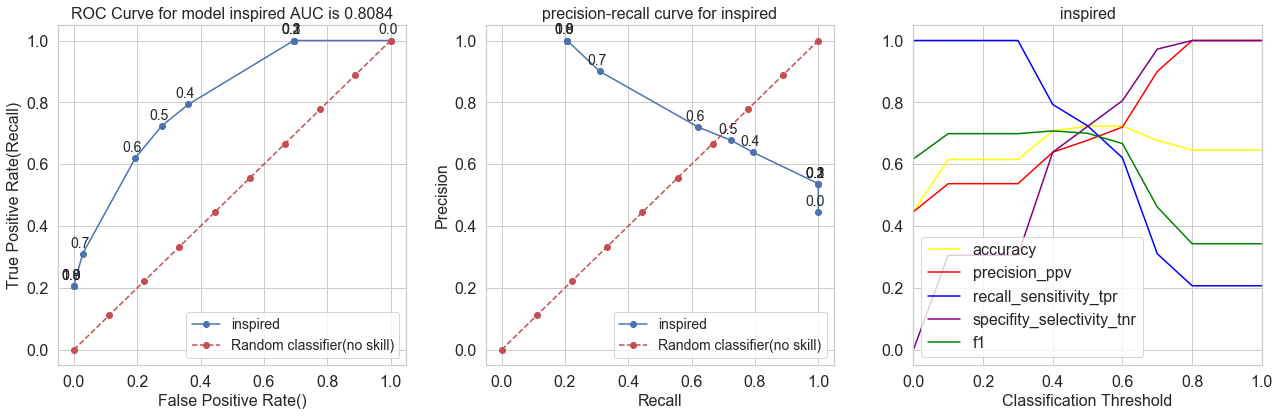

Max evaluation metric for model inspired
* Accuracy:  0.7230769230769231 at threshold  0.5
* Precision:  1.0 at threshold  0.8
* Recall:  1.0 at threshold  0.0
* F1:  0.7076923076923076 at threshold  0.4



Metrics for market per Classification Threshold


,model,threshold,tp,fp,tn,fn,accuracy,precision_ppv,recall_sensitivity_tpr,f1,f2,f0_5,specifity_selectivity_tnr,tpr,fpr
0,market,0.0,54,56,0,0,0.490909,0.490909,1,0.658537,0.828221,0.546559,0,1,1
1,market,0.1,53,26,30,1,0.754545,0.670886,0.981481,0.796992,0.898305,0.716216,0.535714,0.981481,0.464286
2,market,0.2,53,26,30,1,0.754545,0.670886,0.981481,0.796992,0.898305,0.716216,0.535714,0.981481,0.464286
3,market,0.3,53,26,30,1,0.754545,0.670886,0.981481,0.796992,0.898305,0.716216,0.535714,0.981481,0.464286
4,market,0.4,53,26,30,1,0.754545,0.670886,0.981481,0.796992,0.898305,0.716216,0.535714,0.981481,0.464286
5,market,0.5,35,1,55,19,0.818182,0.972222,0.648148,0.777778,0.694444,0.883838,0.982143,0.648148,0.0178571
6,market,0.6,35,1,55,19,0.818182,0.972222,0.648148,0.777778,0.694444,0.883838,0.982143,0.648148,0.0178571
7,market,0.7,35,1,55,19,0.818182,0.972222,0.648148,0.777778,0.694444,0.883838,0.982143,0.648148,0.0178571
8,market,0.8,35,1,55,19,0.818182,0.972222,0.648148,0.777778,0.694444,0.883838,0.982143,0.648148,0.0178571
9,market,0.9,35,1,55,19,0.818182,0.972222,0.648148,0.777778,0.694444,0.883838,0.982143,0.648148,0.0178571


<Figure size 432x288 with 0 Axes>

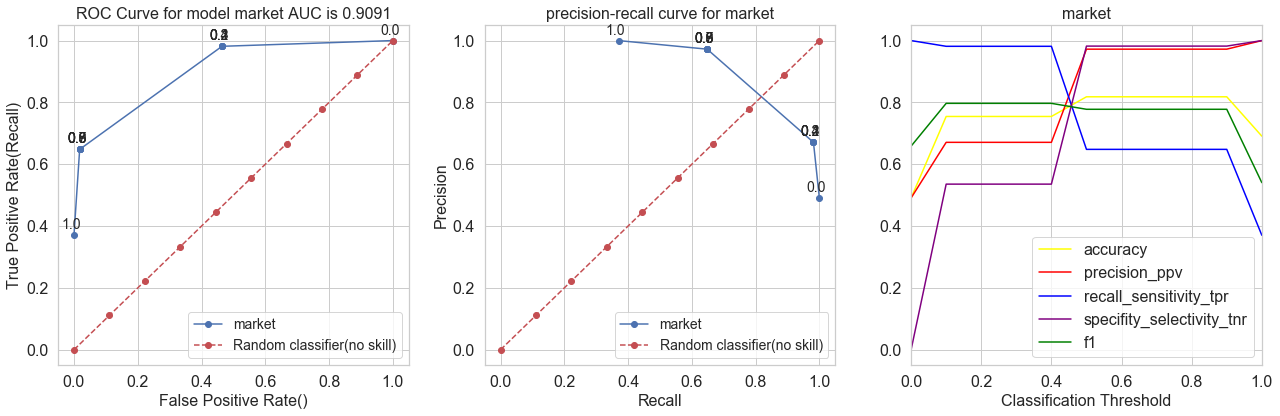

Max evaluation metric for model market
* Accuracy:  0.8181818181818182 at threshold  0.5
* Precision:  1.0 at threshold  1.0
* Recall:  1.0 at threshold  0.0
* F1:  0.7969924812030076 at threshold  0.1



Metrics for project per Classification Threshold


,model,threshold,tp,fp,tn,fn,accuracy,precision_ppv,recall_sensitivity_tpr,f1,f2,f0_5,specifity_selectivity_tnr,tpr,fpr
0,project,0.0,70,56,0,0,0.555556,0.555556,1,0.714286,0.862069,0.609756,0,1,1
1,project,0.1,69,24,32,1,0.801587,0.741935,0.985714,0.846626,0.924933,0.780543,0.571429,0.985714,0.428571
2,project,0.2,69,24,32,1,0.801587,0.741935,0.985714,0.846626,0.924933,0.780543,0.571429,0.985714,0.428571
3,project,0.3,68,20,36,2,0.825397,0.772727,0.971429,0.860759,0.923913,0.805687,0.642857,0.971429,0.357143
4,project,0.4,68,20,36,2,0.825397,0.772727,0.971429,0.860759,0.923913,0.805687,0.642857,0.971429,0.357143
5,project,0.5,64,14,42,6,0.84127,0.820513,0.914286,0.864865,0.893855,0.837696,0.75,0.914286,0.25
6,project,0.6,59,10,46,11,0.833333,0.855072,0.842857,0.848921,0.845272,0.852601,0.821429,0.842857,0.178571
7,project,0.7,59,10,46,11,0.833333,0.855072,0.842857,0.848921,0.845272,0.852601,0.821429,0.842857,0.178571
8,project,0.8,59,10,46,11,0.833333,0.855072,0.842857,0.848921,0.845272,0.852601,0.821429,0.842857,0.178571
9,project,0.9,9,0,56,61,0.515873,1,0.128571,0.227848,0.155709,0.424528,1,0.128571,0


<Figure size 432x288 with 0 Axes>

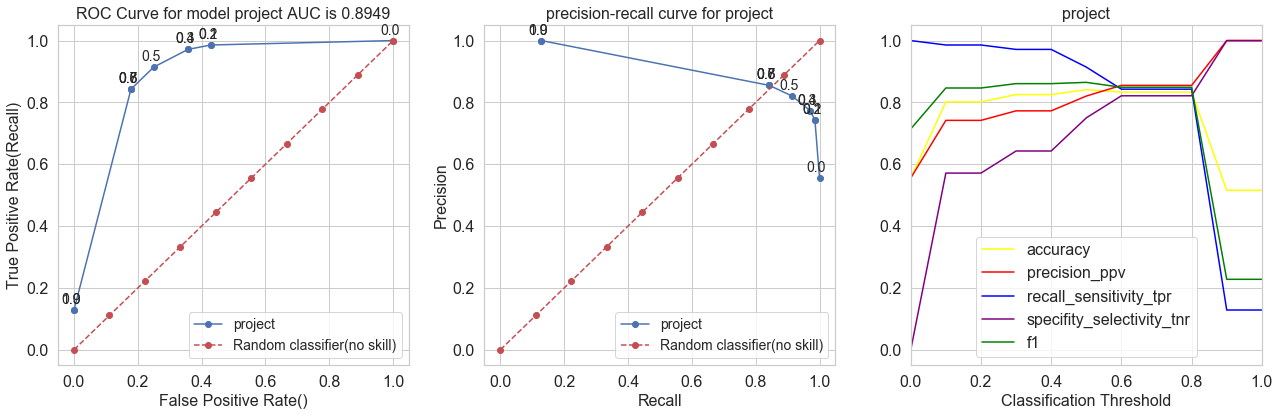

Max evaluation metric for model project
* Accuracy:  0.8412698412698413 at threshold  0.5
* Precision:  1.0 at threshold  0.9
* Recall:  1.0 at threshold  0.0
* F1:  0.8648648648648648 at threshold  0.5



Metrics for renown per Classification Threshold


,model,threshold,tp,fp,tn,fn,accuracy,precision_ppv,recall_sensitivity_tpr,f1,f2,f0_5,specifity_selectivity_tnr,tpr,fpr
0,renown,0.0,29,31,0,0,0.483333,0.483333,1,0.651685,0.823864,0.539033,0,1,1
1,renown,0.1,29,20,11,0,0.666667,0.591837,1,0.74359,0.878788,0.644444,0.354839,1,0.645161
2,renown,0.2,27,7,24,2,0.85,0.794118,0.931034,0.857143,0.9,0.818182,0.774194,0.931034,0.225806
3,renown,0.3,27,7,24,2,0.85,0.794118,0.931034,0.857143,0.9,0.818182,0.774194,0.931034,0.225806
4,renown,0.4,27,7,24,2,0.85,0.794118,0.931034,0.857143,0.9,0.818182,0.774194,0.931034,0.225806
5,renown,0.5,27,7,24,2,0.85,0.794118,0.931034,0.857143,0.9,0.818182,0.774194,0.931034,0.225806
6,renown,0.6,27,7,24,2,0.85,0.794118,0.931034,0.857143,0.9,0.818182,0.774194,0.931034,0.225806
7,renown,0.7,15,0,31,14,0.766667,1,0.517241,0.681818,0.572519,0.842697,1,0.517241,0
8,renown,0.8,15,0,31,14,0.766667,1,0.517241,0.681818,0.572519,0.842697,1,0.517241,0
9,renown,0.9,15,0,31,14,0.766667,1,0.517241,0.681818,0.572519,0.842697,1,0.517241,0


<Figure size 432x288 with 0 Axes>

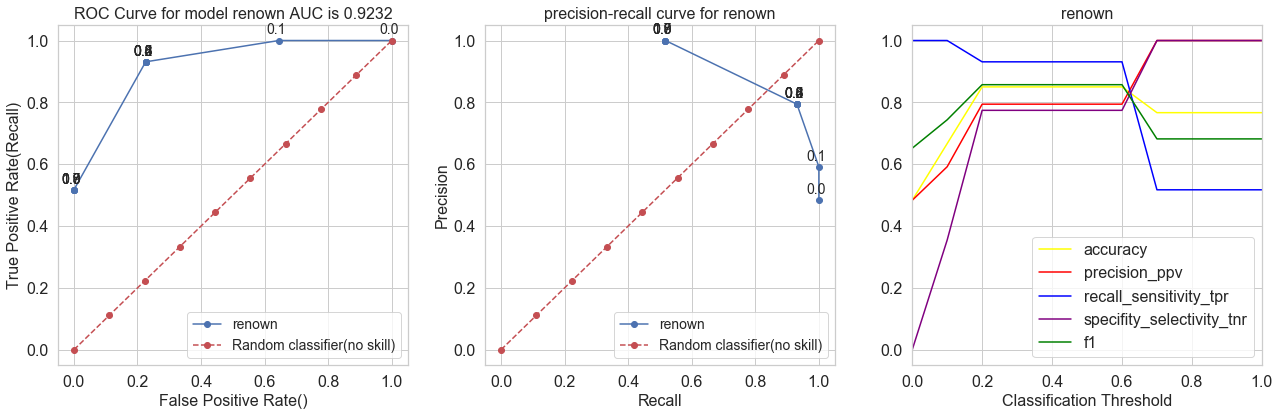

Max evaluation metric for model renown
* Accuracy:  0.85 at threshold  0.2
* Precision:  1.0 at threshold  0.7
* Recall:  1.0 at threshold  0.0
* F1:  0.8571428571428571 at threshold  0.2


'AUC'

{'civic': 0.9289,
 'domestic': 0.9083,
 'green': 0.9862,
 'industrial': 0.9267,
 'inspired': 0.8084,
 'market': 0.9091,
 'project': 0.8949,
 'renown': 0.9232}

<Figure size 432x288 with 0 Axes>

In [19]:
#Generate a list of 100 possible tresholds between 0 and .96, 
# AF why .96?
#thresholds = np.linspace(0,0.96,100)
#thresholds = np.linspace(0,1,10)
#AF: We could evaluate thresholds from 0.0 to 1.0 in increments of 0.1?
thresholds = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
tn_list = []
fp_list = [] 
fn_list = []
tp_list = []

dict_opt_f1_threshold = {}
dict_opt_precision_threshold = {}
dict_opt_recall_threshold = {}
dict_opt_accuracy_threshold = {}
dict_roc_auc = {}

SMALL_SIZE = 8
MEDIUM_SIZE = 14
BIGGER_SIZE = 16



metrics_for_all = pd.DataFrame()

# AF: at each step calculating the precision, recall, F1, and location on the ROC curve. 
#For each convention
for k in _DLModels.keys():
    tn_list = []
    fp_list = [] 
    fn_list = []
    tp_list = []

    #get the model, the validation data input(my_data_x) and the predicted label(y_predict) to compare to the actual label(y_actual).
    my_model = _DLModels[k]
    my_data_x = _DLData_val_x[k]
    my_ir = _DLModelsIsotonicRegression[k]
    
    y_actual = [int(x[0]<x[1]) for x in _DLData_val_y[k]]
    y_predict = my_model.predict(my_data_x)
    
    pos_predict_prob = get_positive_preds_probabilities(y_predict)
    y_predict_isotonic = my_ir.predict(pos_predict_prob)

    pos_predict_prob = y_predict_isotonic #ON or OFF with claibration

    
    dict_roc_auc[k] = roc_auc_score(y_actual ,pos_predict_prob).round(4)

    
    
    for t in thresholds:
        y_pred = get_positive_preds_with_threshold(pos_predict_prob,t)
        confusion_matrix = metrics.confusion_matrix(y_actual, y_pred)
        tn, fp, fn, tp = confusion_matrix.ravel()
        tn_list.append(tn)
        fp_list.append(fp)
        fn_list.append(fn)
        tp_list.append(tp)
    print ("")
    display (HTML("<font color = green><h3><left>*** " + k + "***</left></h3></font>"))
    results_for_current_convention = pd.DataFrame({'threshold': thresholds,
                        'tp': tp_list,
                        'fp': fp_list,
                        'tn': tn_list,
                        'fn': fn_list
                       })
   
    metrics_df =  calculate_metrics(results_for_current_convention, len(y_actual), k);
    print("Metrics for " +k + " per Classification Threshold")
    display(metrics_df)
    metrics_for_all = pd.concat([metrics_for_all,metrics_df], sort = False)
    
    plt.figure(figsize=(18,6))
    plt.subplot(1, 3, 1)
    plt.style.use('seaborn-dark-palette')

    plt.rc('font', size =MEDIUM_SIZE )                  # controls default text sizes
    plt.rc('axes', titlesize=BIGGER_SIZE)   # fontsize of the axes title
    plt.rc('axes', labelsize=BIGGER_SIZE)   # fontsize of the x and y labels
    plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

    my_thresholds = [str(t) for t in metrics_df['threshold']]
    plt.plot(metrics_df['fpr'], metrics_df['tpr'], 'bo-', label = k);
    plt.plot(list(np.linspace(0, 1, num = 10)), list(np.linspace(0, 1, num = 10)), 'ro--', label = 'Random classifier(no skill)');
    for x, y, s in zip(metrics_df['fpr'], metrics_df['tpr'], my_thresholds):
        plt.text(x - 0.04,y + 0.02, s, fontdict={'size': 14});
    plt.legend(prop={'size':14})
    plt.ylabel('True Positive Rate(Recall)'); plt.xlabel('False Positive Rate()');
    plt.title('ROC Curve for model '+k + " AUC is " + str(dict_roc_auc[k]))
    #plt.show()
    #plt.clf()
    

    plt.subplot(1, 3, 2)
    plt.style.use('seaborn-dark-palette')
    plt.plot(metrics_df['recall_sensitivity_tpr'], metrics_df['precision_ppv'], 'bo-', label = k);
    plt.plot(list(np.linspace(0, 1, num = 10)), list(np.linspace(0, 1, num = 10)), 'ro--', label = 'Random classifier(no skill)');
    for x, y, s in zip(metrics_df['recall_sensitivity_tpr'], metrics_df['precision_ppv'], my_thresholds):
        plt.text(x - 0.04,y + 0.02, s, fontdict={'size': 14});
    plt.legend(prop={'size':14})
    plt.ylabel('Precision'); plt.xlabel('Recall');
    plt.title('precision-recall curve for '+k )
    #plt.show()
    #plt.clf()
    
    plt.subplot(1, 3, 3)
    ax = plt.gca()
    plt.title(k)
    metrics_df.plot(kind='line',x='threshold',y='accuracy', color='yellow',ax=ax)
    metrics_df.plot(kind='line',x='threshold',y='precision_ppv', color='red', ax=ax)
    metrics_df.plot(kind='line',x='threshold',y='recall_sensitivity_tpr', color='blue',ax=ax)
    metrics_df.plot(kind='line',x='threshold',y='specifity_selectivity_tnr', color='purple',ax=ax)
    metrics_df.plot(kind='line',x='threshold',y='f1', color='green', ax=ax)
    plt.xlabel('Classification Threshold')
    plt.tight_layout()
    plt.show()
    plt.clf()
    print ("Max evaluation metric for model", k)

    best = metrics_df[['recall_sensitivity_tpr','precision_ppv', 'f1', 'accuracy']].max()
    try:
        best_precision_threshold = metrics_df[['threshold']][metrics_df.precision_ppv == best[1]]['threshold'].iloc[0]
    except:
        best_precision_threshold = metrics_df[['threshold']][metrics_df.precision_ppv == best[1]]['threshold'] 
    
    try:
        best_recall_threshold = metrics_df[['threshold']][metrics_df.recall_sensitivity_tpr == best[0]]['threshold'].iloc[0]     
    except:
        best_recall_threshold = metrics_df[['threshold']][metrics_df.recall_sensitivity_tpr == best[0]]['threshold']
    
    try:
        best_F1_threshold = metrics_df[['threshold']][metrics_df.f1 == best[2]]['threshold'].iloc[0] 
    except:
        best_F1_threshold = metrics_df[['threshold']][metrics_df.f1 == best[2]]['threshold']
        
    try:
        best_accuracy_threshold = metrics_df[['threshold']][metrics_df.accuracy == best[3]]['threshold'].iloc[0] 
    except:
        best_accuracy_threshold = metrics_df[['threshold']][metrics_df.accuracy == best[3]]['threshold']
   
    dict_opt_f1_threshold[k] = best_F1_threshold
    dict_opt_precision_threshold[k] = best_precision_threshold
    dict_opt_recall_threshold[k]  =  best_recall_threshold
    dict_opt_accuracy_threshold[k]  =  best_accuracy_threshold
    print ("* Accuracy: ", best [3], "at threshold ", best_accuracy_threshold)
    print ("* Precision: ", best [1], "at threshold ", best_precision_threshold)
    print ("* Recall: ", best [0], "at threshold ", best_recall_threshold)
    print ("* F1: ", best [2], "at threshold ", best_F1_threshold)

gc.collect()

display ("AUC", dict_roc_auc)
metrics_for_all = metrics_for_all.reset_index().drop("index",  axis=1)


# Evaluation Metrics for over all asystem
In multi-label classification, a misclassification is no longer a hard wrong or right. 
A prediction containing a subset of the actual classes should be considered 
better than a prediction that contains none of them, i.e., predicting two 
of the three labels correctly is better than predicting no labels at all. The following metrics can be used
   * Micro-averaging & Macro-averaging (Label based measures):
   * Hamming-Loss (Example based measure):
   * Exact Match Ratio (Subset accuracy):
   * Mean column-wise ROC AUC (average of the individual AUCs of each predicted column)

Note: If correctly identifying positives is important for us, then we should choose a model with higher 
Recall/Sensitivity. However, if correctly identifying negatives is more important, then we should choose 
higher precision/specificity as the measurement metric. 

In [249]:
#Here we get the validation data per model, predict a score with that model A 
#then predict a score with the x_validation data of model A against all 7 other models.

def get_validation_data(thresholds):
    column_list = []
    column_list.append("text")
    for conv in _DLModels.keys():
        column_list.append(conv)
        column_list.append(conv+"_prob")
        column_list.append(conv+"_prob_iso")
        column_list.append(conv+"_y_pred")
        column_list.append(conv+"_y_pred_iso")
    all_validation_df = pd.DataFrame(columns=column_list)
    validation_df = pd.DataFrame(columns=column_list)
    
   
    for conv in _DLModels.keys():
        validation_df = pd.DataFrame(columns=column_list)
        data_x = _DLData_val_x[conv]
        data_x_txt = _DLData_val_x_txt [conv] 
        y_actual = [int(x[0]<x[1]) for x in _DLData_val_y[conv]]
        
        conv_model = _DLModels[conv]        
        conv_ir = _DLModelsIsotonicRegression[conv]
        
        y_predict = conv_model.predict(data_x)
        y_pos_predict_prob = get_positive_preds_probabilities(y_predict)
        y_predict_isotonic = conv_ir.predict(y_pos_predict_prob)        
        y_pred = get_positive_preds_with_threshold(y_pos_predict_prob, thresholds[conv])
        y_pred_iso = get_positive_preds_with_threshold(y_predict_isotonic, thresholds[conv])
        
        validation_df['text'] = data_x_txt
        validation_df[conv] = y_actual
        validation_df[conv+"_prob"] = y_pos_predict_prob
        validation_df[conv+"_prob_iso"] = y_predict_isotonic
        validation_df[conv+"_y_pred"] = y_pred
        validation_df[conv+"_y_pred_iso"] = y_pred_iso
        #Now put these validation sentences through all the other models.
        all_models = list(_DLModels.keys())
        all_other_models = all_models
        all_other_models.remove(conv)
        for model in all_other_models:
            other_model = _DLModels[model]        
            other_ir = _DLModelsIsotonicRegression[model]
            y_predict = other_model.predict(data_x)
            y_pos_predict_prob = get_positive_preds_probabilities(y_predict)
            y_predict_isotonic = other_ir.predict(y_pos_predict_prob)
            y_pred = get_positive_preds_with_threshold(y_pos_predict_prob, thresholds[model])
            y_pred_iso = get_positive_preds_with_threshold(y_predict_isotonic, thresholds[model])
            validation_df[model] = 0
            validation_df[model+"_prob"] = y_pos_predict_prob
            validation_df[model+"_prob_iso"] = y_predict_isotonic
            validation_df[model+"_y_pred"] = y_pred
            validation_df[model+"_y_pred_iso"] = y_pred_iso
        all_validation_df = pd.concat([all_validation_df, validation_df], sort = False )  
    #add the number of labels per sentence with and without calibration
    y_pred_list = []
    y_pred_iso_list = []
    for x in all_validation_df.columns.values:
        if x.endswith(('_y_pred')):
            y_pred_list.append(x)
        if x.endswith(('_y_pred_iso')):
            y_pred_iso_list.append(x)
                
    pred_sums = all_validation_df[y_pred_list].sum(axis=1)
    pred_iso_sums = all_validation_df[y_pred_iso_list].sum(axis=1)
    all_validation_df['lbl_cnt'] = pred_sums
    all_validation_df['lbl_cnt_iso'] = pred_iso_sums
                                      
    #Check for and remove duplicate rows and duplicate sentences.                                 
    print ("Number of unique strings", len(all_validation_df['text'].unique()))
    print ("Length of data frame", len(all_validation_df.index))
    print ("Num Dupes:", len(all_validation_df.index) - len(all_validation_df['text'].unique()) )
    print ("Dropping duplicate rows")
    all_validation_df = all_validation_df.drop_duplicates(keep = "first")
    all_validation_df = all_validation_df.groupby(['text'], as_index=False).max()
    print ("Number of unique strings after drop", len(all_validation_df['text'].unique()))
    print ("Length of data frame after drop", len(all_validation_df.index))
    print ("Num Dupes:", len(all_validation_df.index) - len(all_validation_df['text'].unique()) )
    #print ("Length of data frame after drop NaN", len(df.index))
    return all_validation_df


In [248]:
my_style = {'description_width': 'initial'}
my_layout = {'width': '600px'}
my_layout_short = {'width': '300px'}
my_layout_shortest = {'width': '250px'}

classifier_thresholds = {}

threshold_best_all = metrics_for_all.head(1).copy()
threshold_t_calab_all = metrics_for_all.head(1).copy()

metrics_list = ['accuracy', 'precision_ppv','recall_sensitivity_tpr','f1','f2','f0_5','specifity_selectivity_tnr']

metric_drop_down = widgets.Dropdown(
            options= metrics_list,
            value= metrics_list[0],
            description='Review Metric  :',
            disabled=False,
            style = my_style,
            layout = my_layout
        )

use_metric_drop_down = widgets.Dropdown(
            options = ["--select--","max value", "T calab"],
            value= "--select--",
            description='Select tresholds to generate results :',
            disabled=False,
            style = my_style,
            layout = my_layout
        )


#Plot the precision v's the classification treshold for all models. This is plotting at which threshold each classifier 
#meets a minimum precision score. 
confidence_goal_slider = widgets.FloatSlider(
            min=0, 
            max=1,
            value = .7,
            step = 0.1,
            description='Confidence level:',
            style = my_style,
            layout = my_layout
            )

confidence_goal_slider.style.handle_color = '#5c85d6'

selectSettingForCoOccurHTML = widgets.HTML(
            "<font color = '#8c8c8c'><h1><center>***  Generate co-occurance matrix   ***</center></h1></font>")

headingHTML = widgets.HTML(
            "<font color = '#8c8c8c'><h1><center>***  View Evaluation Metrics   ***</center></h1></font>")
   
def results_output_function(use_metric_drop_down_value ):
    global threshold_best_all
    global threshold_t_calab_all
    global _DLModels
    thresholds = {}
    if use_metric_drop_down_value == "--select--":
        return
    for k in _DLModels.keys():
        try:
            if use_metric_drop_down_value == "max value":
                threshold = threshold_best_all [threshold_best_all.model == k]['threshold'].iloc[0]
                thresholds[k] = threshold
            if use_metric_drop_down_value == "T calab":
                threshold = threshold_t_calab_all [threshold_t_calab_all.model == k]['threshold'].iloc[0]
                thresholds[k] = threshold
        except:
            print ("No entry for: ", k)

    print (thresholds)
    all_validation_df = get_validation_data(thresholds) 
    display(all_validation_df.head(2))
    
    
    co_occur_list = []
    co_occur_iso_list = []
    rename = []
    for x in all_validation_df.columns.values:
        if x.endswith(('_y_pred')):
            co_occur_list.append(x)
            rename.append(x.replace('_y_pred', ''))
            
        if x.endswith(('_y_pred_iso')):
            co_occur_iso_list.append(x)
        
    co_occur = all_validation_df[co_occur_list].copy()
    co_occur_iso = all_validation_df[co_occur_iso_list].copy()
    
    for old, x in zip(co_occur_list, range(len(co_occur_list))): 
        co_occur = co_occur.rename(columns={old: rename[x]})
        
    for old, x in zip(co_occur_iso_list, range(len(co_occur_iso_list))): 
        co_occur_iso = co_occur_iso.rename(columns={old: rename[x]})
        
    
    text = "ISO Calibrated result "
    display (HTML("<font color = green><h4><left>" + text + "</left></h4></font>"))
    model_helpers.co_occurance_matrix (co_occur_iso)
    model_helpers.label_count_bar(co_occur_iso)
    
    
    print ("")
    text = "NON ISO Calibrated result "
    display (HTML("<font color = green><h4><left>" + text + "</left></h4></font>"))
    model_helpers.co_occurance_matrix (co_occur)
    model_helpers.label_count_bar(co_occur)
    

def output_function(metric_drop_down_value, confidence_goal_slider_value ):
    global thresholds
    global metrics_for_all
    global threshold_best_all
    global threshold_t_calab_all
    global _DLModels
    global classifier_thresholds
    classifier_thresholds = {}
    threshold_best_all = metrics_for_all.head(1).copy()
    threshold_t_calab_all = metrics_for_all.head(1).copy()
    plt.figure(figsize=(10,7))

    performance_goal = confidence_goal_slider_value
    metric = metric_drop_down_value
    auc = []
    auc_t_calab = []
    for k in _DLModels.keys():
        x = thresholds
        y =  metrics_for_all [metrics_for_all.model == k][metric].to_numpy()
        plt.plot(x,y, marker='', linewidth=2, linestyle='dashed', label=k.capitalize()+" model")
        t_index=None
        try:
            t_index = np.argwhere(y > performance_goal)[0]
        except:
            pass    
        if t_index is not None:
            classifier_thresholds[k] = x[t_index[0]]
            thresh = x[t_index[0]]
            auc_t_calab.append(dict_roc_auc[k])
            threshold_t_calab =  metrics_for_all [(metrics_for_all.model == k) & (metrics_for_all['threshold'] == thresh )].iloc[0].to_frame().transpose()
            threshold_t_calab_all = pd.concat([threshold_t_calab_all,threshold_t_calab], sort = False)
        
        auc.append(dict_roc_auc[k])
        best = metrics_for_all [metrics_for_all.model == k][metric].max()
        threshold_best =  metrics_for_all [(metrics_for_all.model == k) & (metrics_for_all[metric] == best )].iloc[0].to_frame().transpose()
        threshold_best_all = pd.concat([threshold_best_all,threshold_best], sort = False)
        
        
        
    threshold_best_all = threshold_best_all.reset_index().drop('index', axis =1).drop(0)
    threshold_t_calab_all = threshold_t_calab_all.reset_index().drop('index', axis =1).drop(0)
    # Declare a list that is to be converted into a column 
    
    threshold_best_all['auc'] = auc
    threshold_t_calab_all['auc'] = auc_t_calab
    
    
    micro = threshold_best_all[['tp', 'fp', 'tn', 'fn']].sum(axis=0)
    tp = micro[0]
    fp = micro[1]
    tn = micro[2]
    fn = micro[3]
    micro_ave_df = calculate_full_set_micro_average([tp, fp, tn, fn]) 
    threshold_best_all = pd.concat([threshold_best_all,micro_ave_df], sort = False)
    threshold_best_all = threshold_best_all.reset_index().drop('index', axis =1)
    threshold_t_calab_all = pd.concat([threshold_t_calab_all,micro_ave_df], sort = False)
    threshold_t_calab_all = threshold_t_calab_all.reset_index().drop('index', axis =1)

    #plt.title("Comparing precission scores for all classifiers", fontdict={'fontsize':20}, pad=25)
    plt.xlabel("Confidence threshold ($T_{calibration}$)", fontsize=14)
    plt.ylabel(metric + " score", fontsize=14)
    plt.hlines(y=performance_goal, xmin=0, xmax=1.00001, color='black', linestyle=":", lw=4, label="$T_{precision}$")
    plt.legend(fontsize=15, bbox_to_anchor=(1.01, 1.01))
    plt.show()
    plt.clf()
    gc.collect()
    
    display (HTML("<font color = green><h3><left>Evaluation Metrics summary per model:</left></h3></font>"))
    text = "Using probability/Classification Threshold based on T calab for "  + metric
    display (HTML("<font color = green><h4><left>" + text + "</left></h4></font>"))
    display(threshold_t_calab_all)
    print ("")
    print ("")
    text = "Using Probability/Classification Threshold based on max "  + metric 
    display (HTML("<font color = green><h4><left>" + text + "</left></h4></font>"))
    display(threshold_best_all)
    use_metric_drop_down.value = "--select--"

    

main_output = widgets.interactive_output( output_function, {
                'metric_drop_down_value': metric_drop_down,
                'confidence_goal_slider_value': confidence_goal_slider,

                })

results_output = widgets.interactive_output( results_output_function, {
                'use_metric_drop_down_value':use_metric_drop_down
                })


display(headingHTML, metric_drop_down,confidence_goal_slider, main_output, selectSettingForCoOccurHTML, use_metric_drop_down, results_output)



# https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c
# AF:  whert is the equalized_precisions_threshold set?

HTML(value="<font color = '#8c8c8c'><h1><center>***  View Evaluation Metrics   ***</center></h1></font>")

Dropdown(description='Review Metric  :', layout=Layout(width='600px'), options=('accuracy', 'precision_ppv', '…

FloatSlider(value=0.7, description='Confidence level:', layout=Layout(width='600px'), max=1.0, style=SliderSty…

Output()

HTML(value="<font color = '#8c8c8c'><h1><center>***  Generate co-occurance matrix   ***</center></h1></font>")

Dropdown(description='Select tresholds to generate results :', layout=Layout(width='600px'), options=('--selec…

Output()

# Now Select the thresholds to use in the final Model.
  
"At this point the overall system is predicting  the probability that a sentence belonging 
to each of the eight conventions.  In general, the distribution of these probabilities may 
not match the expected distribution of observed probabilities in the training data. 
The distribution of the probabilities is therefor calibrated(or adjusted) to better match 
the expected distribution observed in the data. This adjustment is a rescaling operation 
applied after the predictions have been made by the models. This calibration or scaling
can be achieved by using for example, Platt Scaling or Isotonic Regression.



Note in terms of the overall system: The EC identification is an imbalanced classification problem: we have 8 labels we need to identify — with one or two labels(industrial, project) representing the overwhelming majority of the data points in our real world "gathered data", i.e the rate of some of the conventions in our real world "gathered data" will be very low, we will need to consider this later when we are setting the probability/classification thresholds with consideration for the overall system, Not just each individual classifier.


We seek in this work to improve both BR's confidence estimation and prediction through a post calibration and reranking procedure. We take the BR predicted set of labels and its product score as features, extract more features from the prediction itself to capture label constraints, and apply Gradient Boosted Trees (GB) as a calibrator to map these features into a calibrated confidence score. GB not only produces well-calibrated scores (aligned with accuracy and sharp), but also models label interactions, correcting a critical flaw in BR. We further show that reranking label sets by the new calibrated confidence makes accurate set predictions on par with state-of-the-art multi-label classifiers - yet calibrated, simpler, and faster

https://ecmlpkdd2019.org/downloads/paper/391.pdf

 There are two types of confidence scores in BR: 
     * The confidence of an individual label prediction p(yl|x)
     * The confidence of the entire predicted set p(y|x). 

The individual label confidence scores has already been calibrated, with Isotonic regression.
(the established procedures are isotonic regression or Platt scaling) "In machine learning, Platt scaling or Platt calibration is a way of transforming the outputs of a classification model into a probability distribution over classes. The method was invented by John Platt in the context of  support vector machines,[1] replacing an earlier method by Vapnik, but can be applied to other classification 
models.[2] Platt scaling works by fitting a logistic regression model to a classifier's scores." isotonic regression has been shown to work better than Platt scaling, in particular when enough training data 
is available 

We should also be concerned with the set confidence calibration; as calibrating all individual label(individual model) confidence scores does not automatically calibrate the overall set prediction confidence score.


A natural requirement in many end-use applications is that the classifier also provides a well-calibrated confidence (probability) to indicate the likelihood of the predicted set being correct; for example, an application may automate high-confidence predictions while manually verifying low-confidence predictions. The simplest multi-label classifier, called Binary Relevance (BR), applies one binary classifier to each label independently and takes the product of the individual label probabilities as the overall label-set probability (confidence). 

Despite its many known drawbacks, such as generating suboptimal predictions and poorly calibrated confidence scores, BR is widely used in practice due to its speed and simplicity. We seek in this work to improve both BR's confidence estimation and prediction through a post calibration and reranking procedure. 

"We take the BR predicted set of labels and its product score as features, extract more features from the prediction itself to capture label constraints, and apply Gradient Boosted Trees (GB) as a calibrator to map these features into a calibrated confidence score. GB not only produces well-calibrated scores (aligned with accuracy and sharp), but also models label interactions, correcting a critical flaw in BR. We further show that reranking label sets by the new calibrated confidence makes accurate set predictions on par with state-of-the-art multi-label classifiers - yet calibrated, simpler, and faster."


In [ ]:
print(metrics.classification_report(y_actual, y_pred, digits=3))


In [ ]:
#AF: not sure what is the purpose of this, ie why are we training the models again?
def train_models_and_get_scores(df, t_calibration, N_executions=1):
    accs = {}
    precs = {}
    AUCs = {}
    for i in tqdm.tqdm(range(N_executions)):
    
        _DLModels, _DLTokenizers, _DLData_val_x, _DLData_val_y, _DLTrain_histories = model_helpers.train_DL_models(df,
                    data_class_column="convention", 
                    data_label_column="label",
                    tokenizer=extended_tokenizer,
                    random_seed=0,
                    use_validation=True) 

        for k in _DLModels.keys():
            model = _DLModels[k]
            x_val = _DLData_val_x[k]
            y_val = _DLData_val_y[k][:,1]

            pred = model.predict(x_val)[:,1]
            y_pred = apply_pred_threshold(pred, t_calibration)



            if k in accs:
                accs[k].append(accuracy_score(y_val, y_pred))
                precs[k].append(precision_score(y_val, y_pred))
                AUCs[k].append(roc_auc_score(y_val, y_pred))
            else:
                accs[k] = [accuracy_score(y_val, y_pred)]
                precs[k] = [precision_score(y_val, y_pred)]
                AUCs[k] = [roc_auc_score(y_val, y_pred)]
        
    return accs, precs, AUCs

#AF: not sure what is the purpose of this, ie why are we training the models again? commenting out for now:

# accs, precs, AUCs = train_models_and_get_scores(training_df, equalized_precisions_threshold)
# print("Models performance on unseen data:\n\n")
# custom_ordered_keys = ["industrial", "project", "market", "inspired", "civic", "domestic", "green", "renown"]
# for k in custom_ordered_keys:
#     avg_acc = "%.3f" % np.mean(accs[k])
#     avg_auc = "%.3f" % np.mean(AUCs[k])
#     avg_prec = "%.3f" % np.mean(precs[k])
    
#     print("{} & {}  & {} & {}\\".format(k, avg_acc, avg_prec, avg_auc))
#     print("\hline")

In [47]:
#this method is called once for every convention
def compute_confusions(conv, models_, data_x, data_y, calibration_threshold=0.656):
    global classifier_thresholds
    #create a list with a value 0 for each convention.
    matches = [0] * len(classifier_thresholds.keys())
 
    #for convention = conv we will get a list of sentences from the validation data for label = True(1)
    sentences = data_x[conv][np.argwhere(data_y[conv][:,1]==1)]
    shape = sentences.shape
    sentences = sentences.reshape(shape[0], shape[2])
    sent_length = len(sentences)
    
    #iterate through conventions and a value between 0 and len(list "matches")
    for k, idx in zip(classifier_thresholds.keys(), range(len(matches))):
        print(sentences.shape)
        pred = models_[k].predict(sentences, verbose=0)
        pred = np.array(pred)
        matches[idx] = (pred[pred[:,1]> classifier_thresholds[k]]).sum()
    
        
    return matches, sent_length

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          class_lengths = None):
    
    #print(cm)
    if normalize:
        if class_lengths:
            cm = cm.astype('float') / np.array(class_lengths)[:, np.newaxis]
        else:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        #print('Confusion matrix, without normalization')
        pass
    print(np.sum(cm[:,1]))
    
    if not title:
        if normalize:
            title = 'Normalized confusion matrix \n Accuracy: "%.5f"' % np.mean(cm.diagonal()) 
        else:
            title = 'Confusion matrix, without normalization \n Accuracy: "%.5f"' % np.mean(cm.diagonal()) 
            
    classes = [c.capitalize() for c in classes]
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    
    ax.set_ylim(cm.shape[0]-0.5, -0.5)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    
    # Loop over data dimensions and create text annotations.
    fmt = '.2f'
    thresh = cm.max() / 2.
    
    #thresh = 0.5
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    #color=cm[i,j])
                    color="white" if cm[i, j] > thresh else "black")
    
    #fig.tight_layout()
    return ax

In [48]:
y_true = []
y_pred = []

conf_matrix = []
class_lengths = []


for conv in classifier_thresholds.keys():
    print(" -- {}     ".format(conv))
    matches, cl_len = compute_confusions(conv, _DLModels, _DLData_val_x, _DLData_val_y)
    conf_matrix.append(matches)
    class_lengths.append(cl_len)
    
conf_matrix = np.array(conf_matrix)

 -- civic     
(44, 32)
(44, 32)
(44, 32)
(44, 32)
(44, 32)
(44, 32)
(44, 32)
(44, 32)
 -- domestic     
(33, 32)
(33, 32)
(33, 32)
(33, 32)
(33, 32)
(33, 32)
(33, 32)
(33, 32)
 -- green     
(159, 32)
(159, 32)
(159, 32)
(159, 32)
(159, 32)
(159, 32)
(159, 32)
(159, 32)
 -- industrial     
(125, 32)
(125, 32)
(125, 32)
(125, 32)
(125, 32)
(125, 32)
(125, 32)
(125, 32)
 -- inspired     
(29, 32)
(29, 32)
(29, 32)
(29, 32)
(29, 32)
(29, 32)
(29, 32)
(29, 32)
 -- market     
(54, 32)
(54, 32)
(54, 32)
(54, 32)
(54, 32)
(54, 32)
(54, 32)
(54, 32)
 -- project     
(70, 32)
(70, 32)
(70, 32)
(70, 32)
(70, 32)
(70, 32)
(70, 32)
(70, 32)
 -- renown     
(29, 32)
(29, 32)
(29, 32)
(29, 32)
(29, 32)
(29, 32)
(29, 32)
(29, 32)


['civic', 'domestic', 'green', 'industrial', 'inspired', 'market', 'project', 'renown']
3.2983331195901138


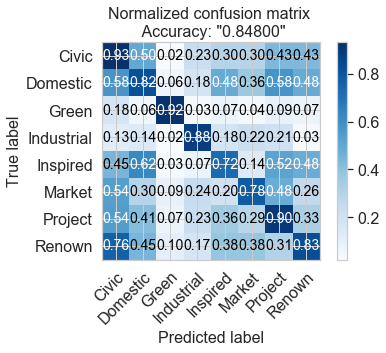

In [49]:
class_names = list(classifier_thresholds.keys())
print (class_names)
plot_confusion_matrix(conf_matrix, class_names, normalize=True, class_lengths = class_lengths)

In [ ]:
conf_matrix

## Matches histograms

In [28]:
def plot_matches_histogram_multiclass(_matches, _models, title=None, data_sources=[]):

    f, ax = plt.subplots(figsize=[12,6])
    
    elems = [k.replace("training_", "").replace(".txt", "").capitalize()  for k in list(_models.keys())]

    
    barWidth = 0.25  # the width of the bars
    # Set position of bar on X axis
    r1 = np.arange(len(elems))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    
    rs = [r1,r2,r3]


    
    for m_idx, m in enumerate(_matches):
        f = np.array(m).sum(axis=0)
        f = f / np.sum(f)
        
        print(f)
        print(r1)

        plt.bar(rs[m_idx], f, width=barWidth, edgecolor='white', label=data_sources[m_idx])
        
    # Add xticks on the middle of the group bars
    plt.xlabel('Conventions', fontweight='bold')
    plt.ylabel('Percentage', fontweight='bold')
    plt.xticks([r + barWidth for r in range(len(elems))], elems)
    plt.legend()
    plt.show()

In [29]:
def get_model_matches(sequences, model):
    data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
    preds = model.predict(data)

    return preds

def count_positive_preds(preds):
    count = 0
    for j in range(len(preds)):
    
        count += int(preds[j][1]>preds[j][0])
    return count

def count_positive_preds_with_threshold(preds, threshold=0.5):
    count = 0
    for j in range(len(preds)):
    
        count += int(preds[j][1]>=threshold)
    return count

def calculate_matches(repositories_descriptions, _models, _tokenizers, model_preds_func=count_positive_preds, threshold=None):
    _repos_matches = []

    ##Â Counting number of matches per model for each repo
    for r_description in repositories_descriptions:
        r_description = r_description.split("\n")

        this_repo_matches = []
        for model_key in _models.keys():
            matches=0

            tokenized_r_description = _tokenizers[model_key].texts_to_sequences(r_description)

            preds = get_model_matches(tokenized_r_description, _models[model_key])

            if threshold is None:
                num_matches = model_preds_func(preds)
            else:
                num_matches = model_preds_func(preds, threshold)

            this_repo_matches.append(num_matches)

        _repos_matches.append(this_repo_matches)
        
    return _repos_matches

# Analyzing the Github and Semantic Scholar data

In [ ]:
AI_repos = pd.read_csv("Data/ToBeAnalyzed/github_AI_repos_dump.csv", sep=";")
not_AI_repos = pd.read_csv("Data/ToBeAnalyzed/github_non_AI_repos_dump.csv")

In [ ]:
not_AI_repos.head()

In [ ]:
MAX_SEQUENCE_LENGTH=32

In [ ]:
AI_texts = AI_repos['cleaned_descriptions'].values

#AI_texts =[t.split("\n") for t in AI_texts]
AI_repos_matches = calculate_matches(AI_texts, 
                                     models[0][0], 
                                    models[0][1],
                                    model_preds_func=count_positive_preds_with_threshold, 
                                    threshold = 0.656) ##As obtained above!



In [ ]:
not_AI_texts = not_AI_repos['cleaned_descriptions'].values
not_AI_repos_matches = calculate_matches(not_AI_texts, 
                                     models[0][0], 
                                    models[0][1],
                                    model_preds_func=count_positive_preds_with_threshold, 
                                    threshold = 0.656) ##As obtained above!



In [ ]:
S2_texts = []
with open("Data/ToBeAnalyzed/s2_random_3345_nn.txt", "rb") as f:
    S2_texts = f.readlines()
    f.close()
S2_texts = [str(s) for s in S2_texts]
    
S2_matches = calculate_matches(S2_texts, 
                                     models[0][0], 
                                    models[0][1],
                                    model_preds_func=count_positive_preds_with_threshold, 
                                    threshold = 0.656) ##As obtained above!




In [ ]:
data_sources = ['AI repositories', 'Not AI repositories', 'AI scientific articles']
plot_matches_histogram_multiclass([AI_repos_matches, not_AI_repos_matches, S2_matches], models[0][0], "Conventions for not AI research articles", data_sources)

In [ ]:
print(len(AI_repos))
print(len(not_AI_repos))okay

In [ ]:
ai_sents = []
for t in AI_repos['cleaned_descriptions'].values:
    for term in t.split("\n"):
        ai_sents.append(str(term))
len(ai_sents)

In [ ]:
not_ai_sents = []
for t in not_AI_repos['cleaned_descriptions'].values:
    for term in t.split("\n"):
        not_ai_sents.append(str(term))
len(not_ai_sents)

In [ ]:
AI_repos['repo_num_stars'].hist(bins=50)

In [ ]:
np.mean(AI_repos['repo_num_stars'])

In [ ]:
np.mean(not_AI_repos['repo_num_stars'])

In [ ]:
np.max(AI_repos['repo_num_stars'])

In [ ]:
np.mean(AI_repos['repo_num_stars'])

In [ ]:
AI_repos.head()

In [ ]:
AI_repos['repo_language'].mode()

In [ ]:
not_AI_repos['repo_language'].mode()

In [ ]:
len(AI_repos[AI_repos['repo_language'] == 'Python']) / len(AI_repos)

In [ ]:
len(not_AI_repos[not_AI_repos['repo_language'] == 'JavaScript']) / len(not_AI_repos)

# Get a list of keywords per convention from the Training data

In [ ]:
#Read the combined original training data and audited data file from "training_ALL.tsv"
#Note this method already calls "remove_line_breaks"
USE_GIT_HUB = True

print (paths.TRAINING_DATA_ALL_DIR_FILE_GIT)
print (paths.TRAINING_DATA_ALL_DIR_FILE_LOCAL)

#Note this method already calls "remove_line_breaks"
training_df = model_helpers.get_training_data(
                            USE_GIT_HUB,
                            paths.TRAINING_DATA_ALL_DIR_FILE_GIT,
                            paths.TRAINING_DATA_ALL_DIR_FILE_LOCAL, 
                            paths.GIT_OWNER,
                            paths.GIT_REPO)

display (training_df.head())

for c in training_df['convention'].unique():
    print(c)
    print("number of sentences", len(training_df[training_df['convention'] == c]))
    print("number of sentences in class 1",len(training_df[ (training_df['convention'] == c) & (training_df['label'] == 1)]))
    print()

In [ ]:
#AF: to generate the keywords we must use only the data from training data where label = 1
custom_ordered_keys = ["industrial", "project", "market", "inspired", "civic", "domestic", "green", "renown"]
docs = []

for c in custom_ordered_keys:
    #docs.append("\n".join(list(training_df[training_df['convention'] == c]['text'].values)))
    docs.append("\n".join(list(training_df[ (training_df['convention'] == c) & (training_df['label'] == 1)]['text'].values)))

In [ ]:
#AF: https://gist.github.com/sebleier/554280
stopwords = parsing_helpers.get_stop_words(paths.STOP_WORDS_DIR_FILE_LOCAL)

stopwords = ["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "A", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "after", "afterwards", "ag", "again", "against", "ah", "ain", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appreciate", "approximately", "ar", "are", "aren", "arent", "arise", "around", "as", "aside", "ask", "asking", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "B", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "been", "before", "beforehand", "beginnings", "behind", "below", "beside", "besides", "best", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "C", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "ci", "cit", "cj", "cl", "clearly", "cm", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "could", "couldn", "couldnt", "course", "cp", "cq", "cr", "cry", "cs", "ct", "cu", "cv", "cx", "cy", "cz", "d", "D", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "dj", "dk", "dl", "do", "does", "doesn", "doing", "don", "done", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "E", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "F", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "G", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "H", "h2", "h3", "had", "hadn", "happens", "hardly", "has", "hasn", "hasnt", "have", "haven", "having", "he", "hed", "hello", "help", "hence", "here", "hereafter", "hereby", "herein", "heres", "hereupon", "hes", "hh", "hi", "hid", "hither", "hj", "ho", "hopefully", "how", "howbeit", "however", "hr", "hs", "http", "hu", "hundred", "hy", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "im", "immediately", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "inward", "io", "ip", "iq", "ir", "is", "isn", "it", "itd", "its", "iv", "ix", "iy", "iz", "j", "J", "jj", "jr", "js", "jt", "ju", "just", "k", "K", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "ko", "l", "L", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "M", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "my", "n", "N", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "neither", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "O", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "otherwise", "ou", "ought", "our", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "P", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "pp", "pq", "pr", "predominantly", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "Q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "R", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "S", "s2", "sa", "said", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "seem", "seemed", "seeming", "seems", "seen", "sent", "seven", "several", "sf", "shall", "shan", "shed", "shes", "show", "showed", "shown", "showns", "shows", "si", "side", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somehow", "somethan", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "sz", "t", "T", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "thats", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "thereof", "therere", "theres", "thereto", "thereupon", "these", "they", "theyd", "theyre", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "U", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "used", "useful", "usefully", "usefulness", "using", "usually", "ut", "v", "V", "va", "various", "vd", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "W", "wa", "was", "wasn", "wasnt", "way", "we", "wed", "welcome", "well", "well-b", "went", "were", "weren", "werent", "what", "whatever", "whats", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "whom", "whomever", "whos", "whose", "why", "wi", "widely", "with", "within", "without", "wo", "won", "wonder", "wont", "would", "wouldn", "wouldnt", "www", "x", "X", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "Y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "your", "youre", "yours", "yr", "ys", "yt", "z", "Z", "zero", "zi", "zz"]

In [ ]:
#create a vocabulary of words, 
#ignore words that appear in 85% of documents, 
#eliminate stop words
cv=CountVectorizer(max_df=0.85,stop_words=stopwords)
word_count_vector=cv.fit_transform(docs)
print (cv)

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

MIN_TFIDF_SCORE = 0.05

def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

def extract_topn_from_vector(feature_names, sorted_items, topn=10, min_score=MIN_TFIDF_SCORE):
    """get the feature names and tf-idf score of top n items"""
    #use only items with > min score
    sorted_items = [[idx, score] for idx,score in sorted_items if score>=min_score]
    
    #return only top n items
    if len(sorted_items) > topn:
        sorted_items = sorted_items[:topn]
        
    score_vals = []
    feature_vals = []

    for idx, score in sorted_items:
        fname = feature_names[idx]
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])

    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

In [ ]:
# you only needs to do this once
feature_names=cv.get_feature_names()


# get the document that we want to extract keywords from
for doc_idx, doc in enumerate(docs):
    print("=====================================")
    print("         {}                   ".format(custom_ordered_keys[doc_idx]))
    print("=====================================")
    
    #generate tf-idf for the given document
    tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

    #sort the tf-idf vectors by descending order of scores
    sorted_items=sort_coo(tf_idf_vector.tocoo())

    #extract only the top n; n here is 30
    keywords=extract_topn_from_vector(feature_names, sorted_items, 30, MIN_TFIDF_SCORE)
    print(keywords)
          

display (HTML("<font color = green><h3><left>***Top 5 Keywords from training data for paper Results***</left></h3></font>"))
for doc_idx, doc in enumerate(docs):
    print("=====================================")
    print("         {}                   ".format(custom_ordered_keys[doc_idx]))
    print("=====================================")
    

    #generate tf-idf for the given document
    tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

    #sort the tf-idf vectors by descending order of scores
    sorted_items=sort_coo(tf_idf_vector.tocoo())

    
    #Extract the top 5 for the paper Results
    keywords=extract_topn_from_vector(feature_names,sorted_items, 5, MIN_TFIDF_SCORE)
    print(keywords)
       

In [ ]:
# now combine the training data keywords with the domain expert keywords.
keyword_from_social_scientists_dict = {
    'industrial': 
        ['efficiency', 'efficiant', 'performance', 'performances', 'productivity', 'productive', 'output', 'outputs', 'control', 'power', 'functionality', 'functional', 'organisation', 'organisations', 'professional', 'professionals', 'profession', 'professions', 'reliability', 'reliable', 'foreseeability', 'qualification', 'qualifications', 'expert', 'experts', 'expertise', 'progress' , 'standard', 'standards', 'standardized', 'norms', 'norm', 'growth', 'quantification', 'quantifiy', 'measurement', 'measure', 'measures', 'engineering', 'engineer', 'forecast', 'linearity', 'extrapolation', 'extrapolate', 'scientific', 'plans', 'plan', 'audit', 'audits', 'benchmark', 'benchmarks', 'benchmarking', 'test', 'tests'],
    'project':
        ['flexibility', 'project', 'projects', 'networking', 'networker', 'networkers', 'activity', 'intermediary', 'mediation', 'switch', 'switching', 'shift', 'shifting', 'mobility', 'dynamic', 'transition', 'transitions', 'temporality', 'fluidity', 'communication', 'communications', 'communicate', 'initiative', 'initiatives', 'bridging', 'adapt', 'adaption', 'adaptions'],
    'market':
        ['wealth', 'money', 'goods', 'rival', 'selfishness', 'winner', 'winners', 'price', 'customer', 'customers', 'customized', 'seller', 'sellers', 'sell', 'vendor', 'vendors', 'buyer', 'buyers', 'buy', 'purchaser', 'purchasers', 'purchase', 'opportunity', 'opportunities', 'competition', 'compete', 'sale', 'sales', 'business', 'interest', 'transaction', 'transactions', 'availability', 'owner', 'owners', 'bargain', 'contract', 'contracts', 'pay', 'deal', 'trade', 'scarcity', 'trading', 'entrepreneur', 'entrepreneurs', 'entrepreneurial', 'market', 'markets', 'marketing', 'marketplace'],
    'inspired':
        ['inspiration', 'illuminated', 'unexpected', 'feeling', 'fascination', 'fascinating', 'thrilling', 'genuineness', 'intuition', 'genius', 'brilliant', 'uniqueness', 'non-conformity', 'non-conform', 'passion', 'passionate', 'creative', 'creativity', 'imagination', 'visionary', 'extraordinary', 'emotional', 'conviction', 'holy', 'gifted', 'blessed'],
    'civic':
        ['collective', 'collectives', 'common good', 'community', 'communities', 'representative', 'representatives', 'general interest', 'unite', 'unity', 'union', 'unions', 'majority', 'civil right', 'civil rights', 'assembly', 'democracy', 'vote', 'votes', 'voting', 'election', 'elections', 'elect', 'equality', 'fair', 'fairness', 'law', 'laws', 'justice', 'unbiased', 'impartial'],
    'domestic':
        ['superior', 'superiority', 'continuity', 'continuation', 'dependence', 'dependency', 'familiarity', 'tradition', 'traditions', 'origins', 'origin', 'routine', 'routines', 'habit', 'habits', 'etiquette', 'common sense', 'respect', 'duty', 'duties', 'trust', 'craft', 'crafts', 'craftsman', 'crafted'],
    'green':
        ['nature', 'ecological', 'ecology', 'renewable', 'recyclable', 'recycle', 'sustainable', 'sustainability', 'preserve', 'preservation', 'holism', 'holistic', 'green', 'emission', 'organic', 'organical'],
    # 'Vitality'
    'renown':
        ['acknowledgement', 'praise', 'public relation', 'public relations', 'public opinion', 'brands', 'brand', 'audience', 'follower', 'followers', 'supporter', 'supporters', 'fame', 'influence', 'influences', 'glory', 'attractive', 'appealing']   
}

# END Keywords

In [ ]:
training_df[training_df['convention'] == 'inspired']

In [ ]:
for c in training_df['convention'].unique():
    print(c)
    print(len(training_df[training_df['convention'] == c]))
    print()

In [ ]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


digits = load_digits()
X, y = digits.data, digits.target


title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
# Function to create model, required for KerasClassifier
def create_model(epochs=20):
    word_index = extended_tokenizer.word_index
    num_epochs = epochs
    EMBEDDING_DIM=100
    MAX_SEQUENCE_LENGTH=32
    
    embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

    embedding_layer = Embedding(len(word_index) + 1,
                                EMBEDDING_DIM,
                                weights=[embedding_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=False)


    convs = []
    filter_sizes = [3,4,5]

    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)

    for fsz in filter_sizes:
        l_conv = Conv1D(nb_filter=128,filter_length=fsz,activation='relu')(embedded_sequences)
        l_pool = MaxPooling1D(5)(l_conv)
        convs.append(l_pool)

    l_merge = Concatenate(axis=1)(convs)#

    l_cov1= Conv1D(128, 5, activation='relu')(l_merge)
    l_pool1 = MaxPooling1D(5)(l_cov1)

    l_flat = Flatten()(l_pool1)
    l_dense = Dense(128, activation='relu')(l_flat)
    preds = Dense(2, activation='softmax')(l_dense)

    model = Model(sequence_input, preds)
    model.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['acc'])
    return model
    
model = KerasClassifier(build_fn=create_model, epochs=20, verbose=0)

In [ ]:
np.linspace(.1, 1.0, 2)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [ ]:
training_df['convention'].unique()

In [ ]:
for _conv in training_df['convention'].unique():
    tmp_df_train = training_df[training_df['convention']==_conv]

    texts = tmp_df_train['text'].values
    labels = tmp_df_train['label'].values

    sequences = extended_tokenizer.texts_to_sequences(texts)


    data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

    labels = to_categorical(np.asarray(labels))

    X=data
    y=labels

    title = "Learning Curves ({})".format(_conv.capitalize())
    # Cross validation with 100 iterations to get smoother mean test and train
    # score curves, each time with 20% data randomly selected as a validation set.
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

    estimator = KerasClassifier(build_fn=create_model, epochs=20, verbose=0)
    plot_learning_curve(estimator, title, X, y, ylim=(0.6, 1.01), cv=cv, n_jobs=4)

    plt.show()

In [ ]:
data_portions = np.arange(.1, 1.01, 0.10)
print(data_portions)

accs = []

for p in data_portions:
    
    tmp_df_train = training_df[training_df['convention']=='industrial']

    texts = tmp_df_train['text'].values
    labels = tmp_df_train['label'].values

    sequences = extended_tokenizer.texts_to_sequences(texts)


    data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

    labels = to_categorical(np.asarray(labels))
    
    selected_indexes = random.choice(list(enumerate(X)))[0]
    
    tmp_x = data[selected_indexes]
    tmp_y = labels[selected_indexes]
    
    
    
    
    

    title = "Learning Curves (Industrial)"
    # Cross validation with 100 iterations to get smoother mean test and train
    # score curves, each time with 20% data randomly selected as a validation set.
    #cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

    estimator = KerasClassifier(build_fn=create_model, epochs=20, verbose=0)
    
    
    estimator.train(tmp_x)

    
    accs.append(metrics.accuracy_score())